In [4]:
import os 
from dotenv import load_dotenv
load_dotenv('../../.env.secrets')
os.getenv("dbt_user")

'dbt'

In [5]:
import pandas as pd 
import snowflake.connector
import os

def run_query(query):
    # Define connection parameters
    conn = snowflake.connector.connect(
        user=os.getenv("dbt_user"),
        password=os.getenv("dbt_password"),
        account=os.getenv("dbt_account"),
        warehouse="COMPUTE_WH",
        database="POP_PREDICTION",
        schema="DEV",  # Change to "dev" if needed
        role="transform"
    )

    # Create a cursor object
    cur = conn.cursor()

    # Execute a query
    cur.execute(query)

    # Fetch all results into a pandas DataFrame
    df = pd.DataFrame(cur.fetchall(), columns=[desc[0] for desc in cur.description])

    # Close the cursor and connection
    cur.close()
    conn.close()

    return df

In [6]:
full_dataset = run_query("select * from POP_PREDICTION.DEV.POP_PREDICTION_TRAINING order by year, state_name")
full_dataset

STATE_NAME  POPULATION  YEAR      GDP  BIRTHS  NUM_HOUSING_UNITS  \
0          Alabama     4785514  2010   177511   60050            2174761   
1           Alaska      713982  2010    53654   11471             307181   
2          Arizona     6407342  2010   250527   87477            2849425   
3         Arkansas     2921998  2010   101699   38540            1318072   
4       California    37319550  2010  1938603  510198           13688147   
..             ...         ...   ...      ...     ...                ...   
595       Virginia     8658910  2021   613920   95825            3651952   
596     Washington     7743760  2021   688632   83911            3255564   
597  West Virginia     1785618  2021    86510   17198             858447   
598      Wisconsin     5881608  2021   369032   61781            2748570   
599        Wyoming      579636  2021    42176    6237             274346   

    HOUSE_PRICE_INDEX  OUTFLOW_MIGRATION_NUMBER_OF_INDIVIDUALS  \
0          184.666667                                    89794   
1          182.833333                                    30965   
2          193.583333                                   158038   
3          184.666667                                    60755   
4          183.666667                                   383709   
..                ...                                      ...   
595        315.083333                                   233305   
596        403.666667                                   203735   
597        315.083333                                    36417   
598        276.916667                                    92642   
599        328.583333                                    24482   

     INFLOW_MIGRATION_NUMBER_OF_INDIVIDUALS PERCENTAGE_UNDER_5_YEARS  ...  \
0                                     88001           0.060000000000  ...   
1                                     32656           0.080000000000  ...   
2                                    162164           0.070000000000  ...   
3                                     57111           0.070000000000  ...   
4                                    412899           0.070000000000  ...   
..                                      ...                      ...  ...   
595                                  240148           0.055656000000  ...   
596                                  222533           0.055891000000  ...   
597                                   34400           0.049796000000  ...   
598                                   91825           0.053472000000  ...   
599                                   22004           0.052234000000  ...   

    PERCENTAGE_40_TO_44_YEARS PERCENTAGE_45_TO_49_YEARS  \
0              0.070000000000            0.070000000000   
1              0.070000000000            0.080000000000   
2              0.060000000000            0.070000000000   
3              0.060000000000            0.070000000000   
4              0.070000000000            0.070000000000   
..                        ...                       ...   
595            0.066879000000            0.060737000000   
596            0.069829000000            0.058727000000   
597            0.065155000000            0.059550000000   
598            0.062116000000            0.056558000000   
599            0.060870000000            0.057657000000   

    PERCENTAGE_50_TO_54_YEARS PERCENTAGE_55_TO_59_YEARS  \
0              0.070000000000            0.070000000000   
1              0.080000000000            0.070000000000   
2              0.070000000000            0.060000000000   
3              0.070000000000            0.060000000000   
4              0.070000000000            0.060000000000   
..                        ...                       ...   
595            0.064222000000            0.064662000000   
596            0.061119000000            0.060320000000   
597            0.065001000000            0.067323000000   
598            0.062548000000            0.070207000000   
599            0.05

In [7]:
average_by_state_full_dataset = run_query("select * from POP_PREDICTION.DEV.pop_prediction_training_avg_across_state order by year")
average_by_state_full_dataset

AVG_POPULATION  YEAR        AVG_GDP    AVG_BIRTHS AVG_HOUSING_UNITS  \
0   6174437.220000  2010  296778.580000  79804.420000    2630573.900000   
1   6219263.820000  2011  307571.700000  78885.900000    2640329.020000   
2   6264838.500000  2012  320564.440000  78868.840000    2650684.500000   
3   6308167.760000  2013  333050.320000  78457.860000    2664722.400000   
4   6354454.520000  2014  347480.660000  79571.340000    2681674.560000   
5   6401239.600000  2015  361161.020000  79378.380000    2699551.140000   
6   6447683.580000  2016  371412.780000  78720.340000    2719503.580000   
7   6488500.980000  2017  387466.480000  76918.800000    2741044.000000   
8   6522681.040000  2018  407891.840000  75650.000000    2763939.540000   
9   6552434.000000  2019  425003.700000  74769.220000    2787229.020000   
10  6618136.060000  2020  420929.000000  72095.460000    2809139.400000   
11  6628610.080000  2021  466108.940000  73112.640000    2836131.100000   

   AVG_HOUSE_PRICE_INDEX AVG_OUTFLOW_MIGRATION AVG_INFLOW_MIGRATION  \
0       188.814999920000         109542.800000        109578.720000   
1       181.559999940000         126118.760000        126083.780000   
2       185.883333360000         131682.320000        131621.680000   
3       197.263333360000         123976.460000        123893.020000   
4       206.006666740000          89732.260000         89714.860000   
5       216.049999860000         124489.400000        124390.300000   
6       227.869999840000         169178.540000        168929.920000   
7       241.551666500000         146798.100000        129050.800000   
8       256.333333360000         124417.140000        124286.340000   
9       269.709999980000         137447.460000        137140.840000   
10      291.244999900000         137785.100000        137478.060000   
11      339.963333380000         138455.620000        138294.960000   

   AVG_PERCENTAGE_UNDER_5_YEARS AVG_PERCENTAGE_5_TO_9_YEARS  ...  \
0                0.065800000000              0.065800000000  ...   
1                0.065000000000              0.065600000000  ...   
2                0.063400000000              0.066000000000  ...   
3                0.062800000000              0.065600000000  ...   
4                0.061800000000              0.065200000000  ...   
5                0.061000000000              0.065000000000  ...   
6                0.061000000000              0.064200000000  ...   
7                0.060634500000              0.062181660000  ...   
8                0.059663340000              0.060818800000  ...   
9                0.058680740000              0.060437420000  ...   
10               0.057246140000              0.060454120000  ...   
11               0.055811540000              0.060470820000  ...   

   AVG_PERCENTAGE_40_TO_44_YEARS AVG_PERCENTAGE_45_TO_49_YEARS  \
0                 0.067200000000                0.073200000000   
1                 0.067000000000                0.070600000000   
2                 0.066600000000                0.068200000000   
3                 0.065000000000                0.066600000000   
4                 0.063200000000                0.064800000000   
5                 0.061600000000                0.063400000000   
6                 0.060400000000                0.064000000000   
7                 0.058844600000                0.062448240000   
8                 0.059510660000                0.061755040000   
9                 0.060374360000                0.060476220000   
10                0.061881790000                0.059225890000   
11                0.063389220000                0.057975560000   

   AVG_PERCENTAGE_50_TO_54_YEARS AVG_PERCENTAGE_55_TO_59_YEARS  \
0                 0.073800000000                0.066600000000   
1                 0.073600000000                0.068000000000   
2                 0.073000000000                0.069200000000   
3                 0.072200000000                0.069400000000   
4                 0.0714000000

From the above, we can see that all columns have a significant autocorrelation except for migration flows.

/var/folders/2l/5745d1rs293_5b5jq6sytzph0000gn/T/ipykernel_97033/3676430336.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(12, 6))


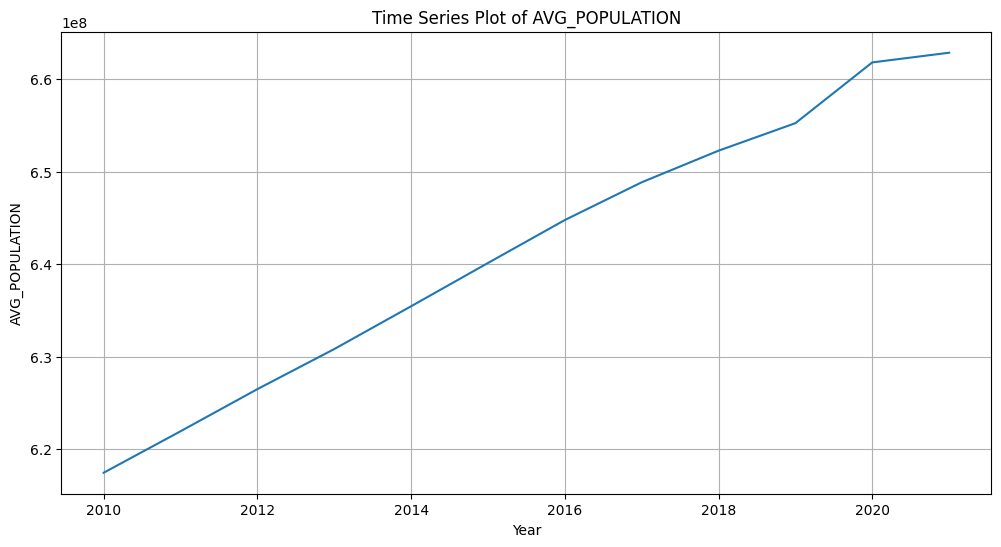

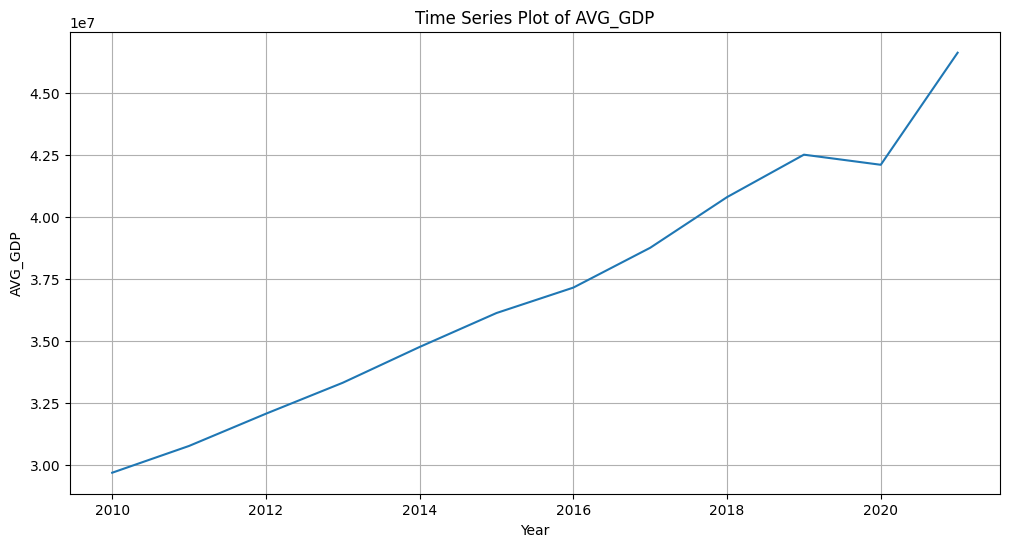

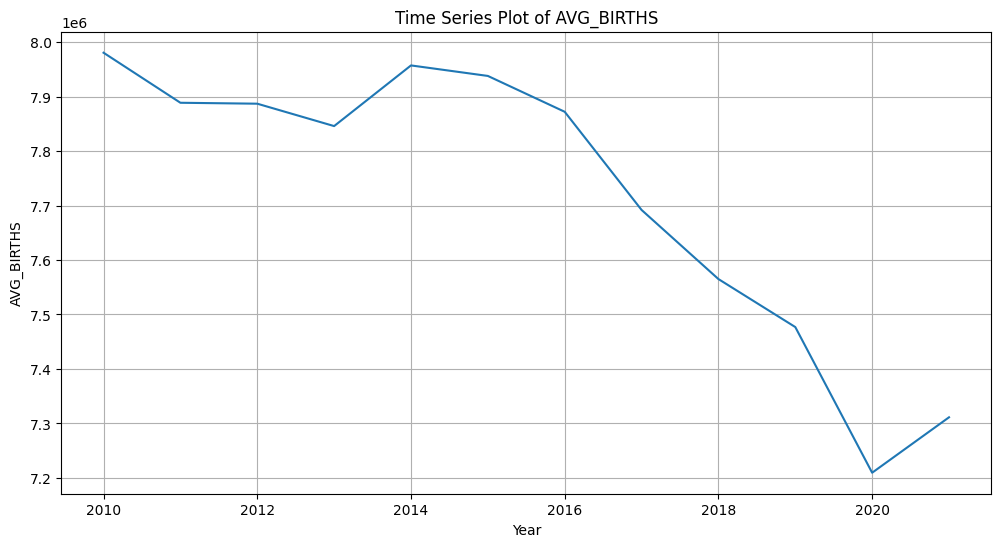

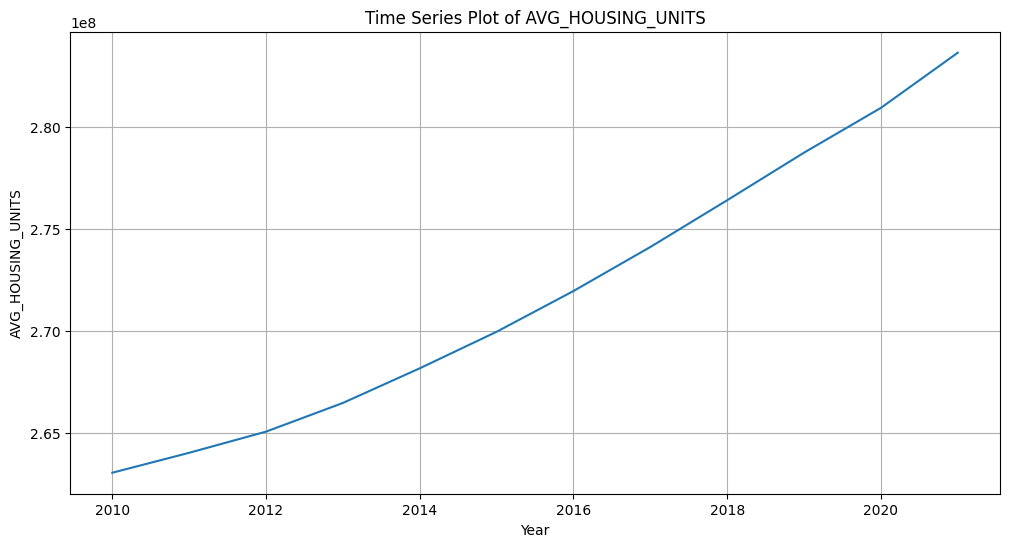

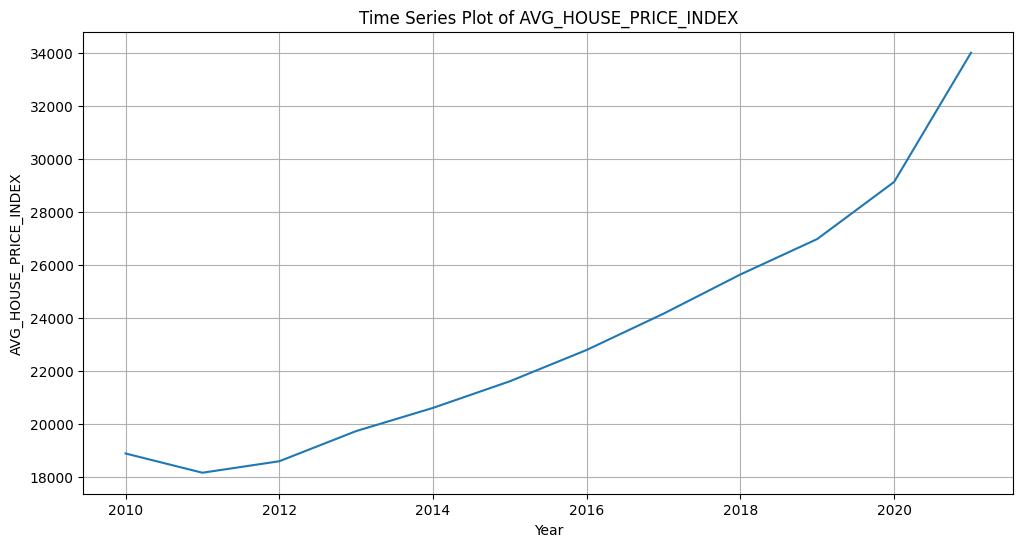

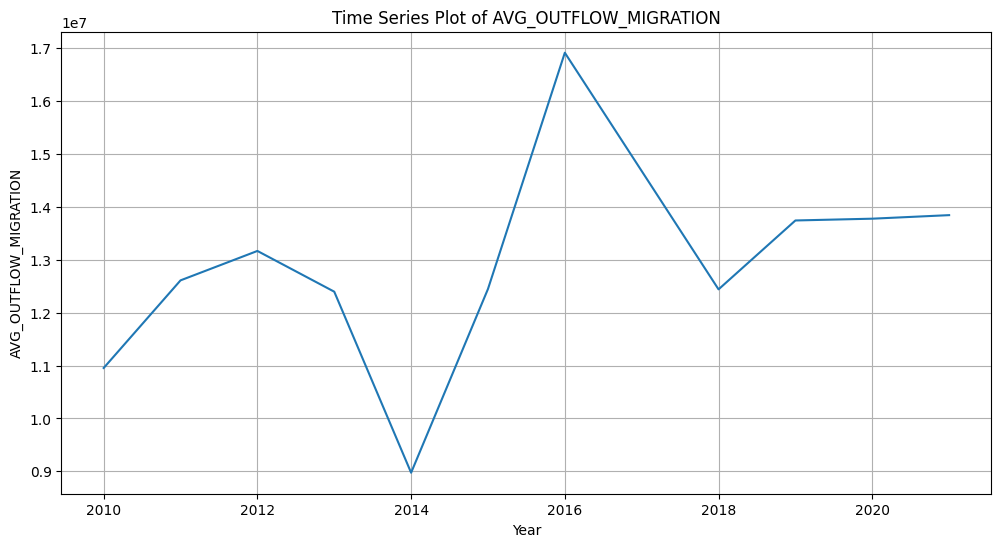

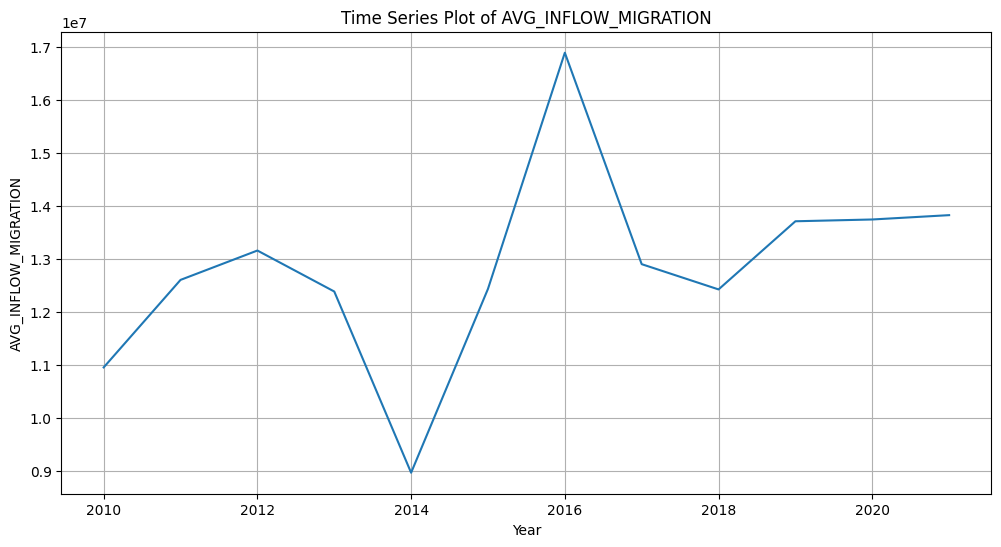

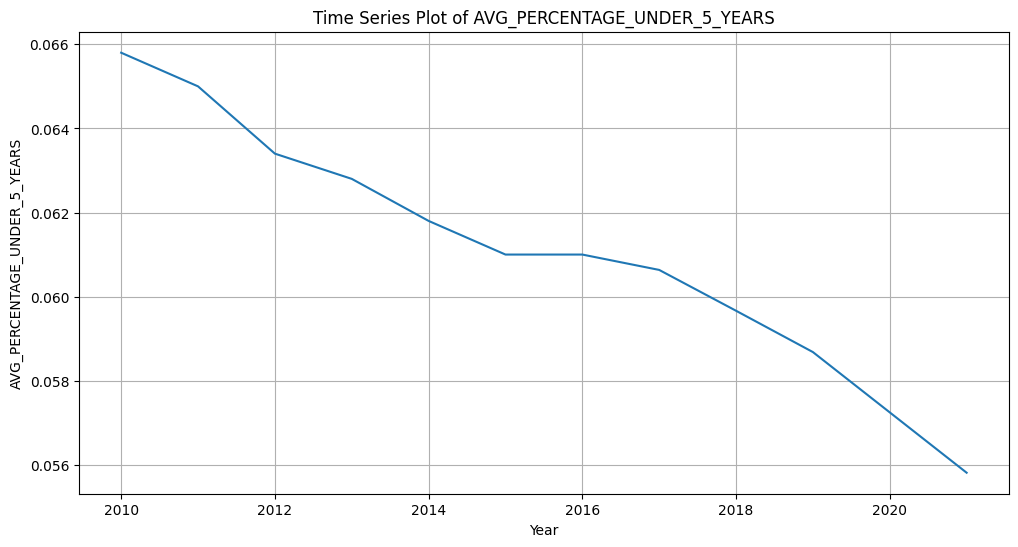

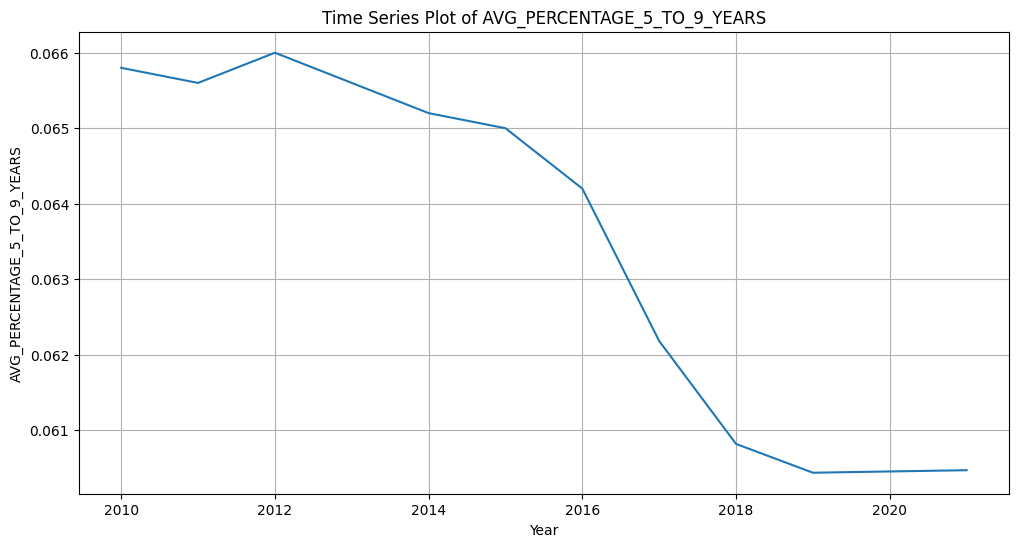

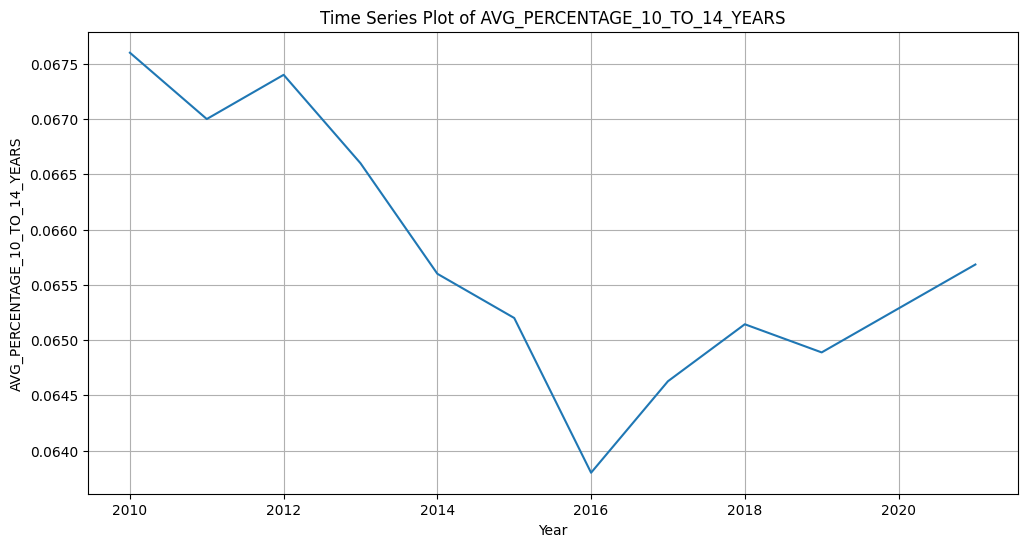

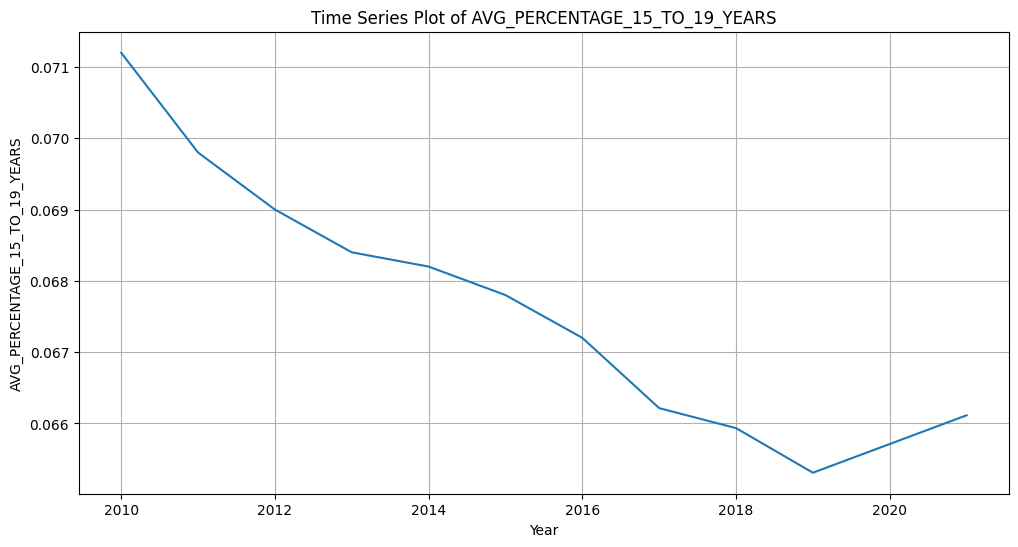

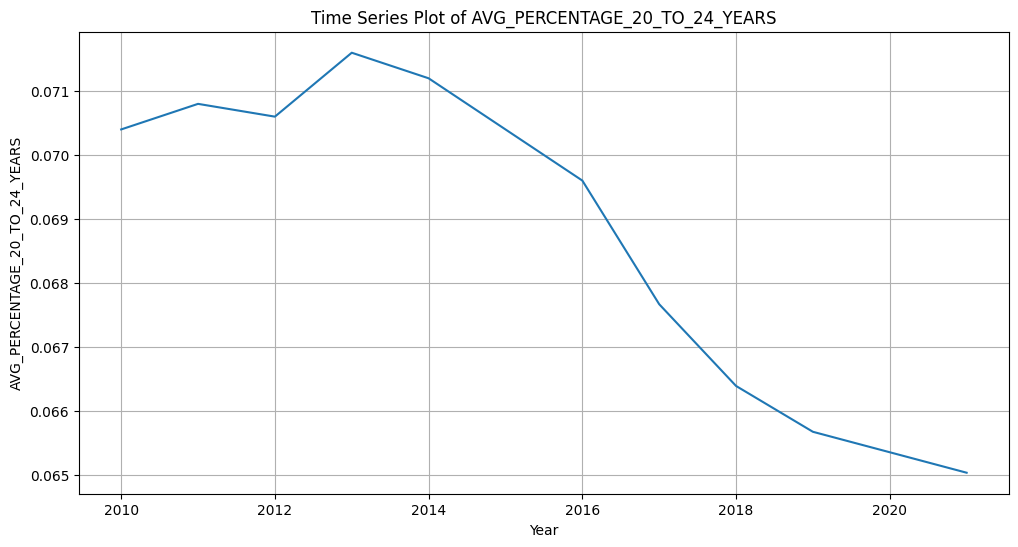

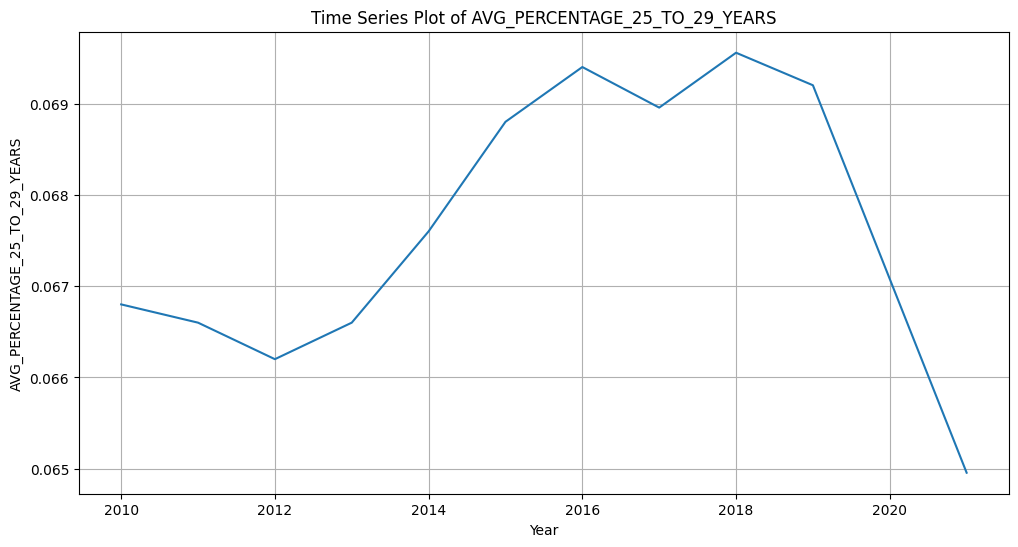

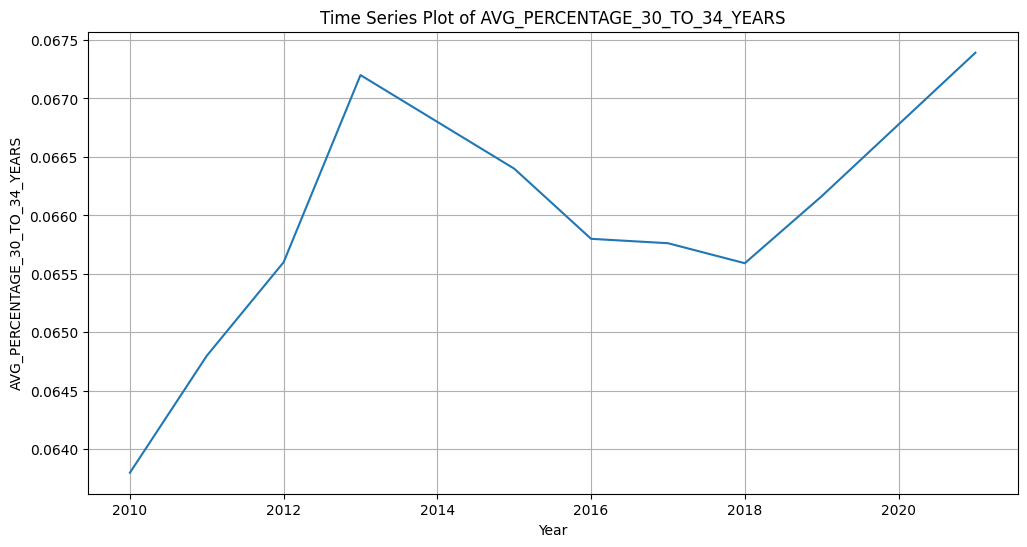

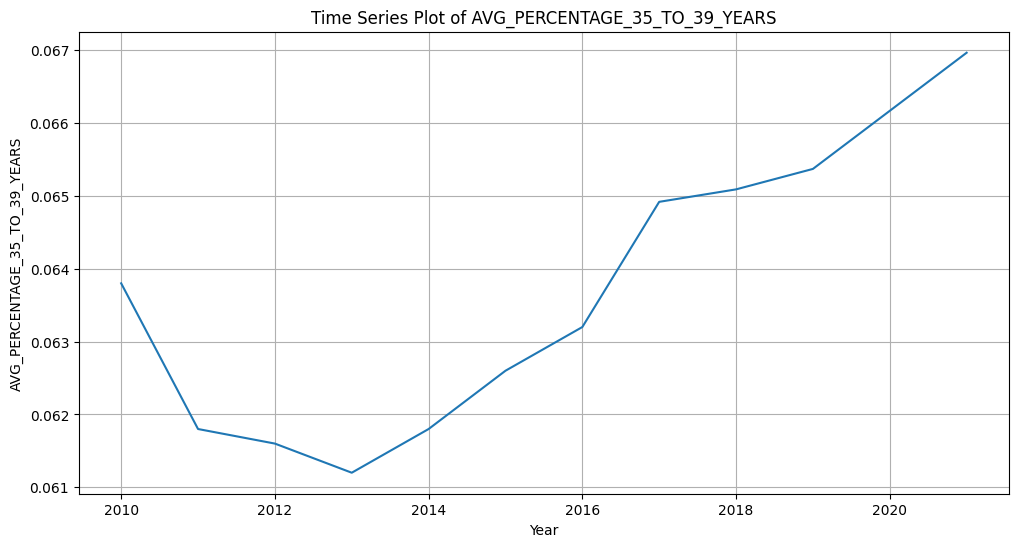

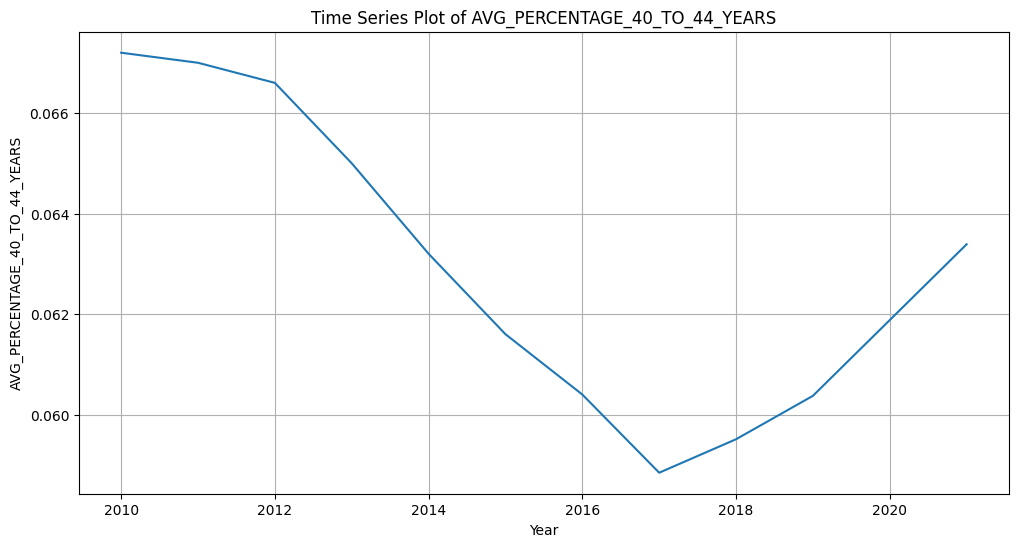

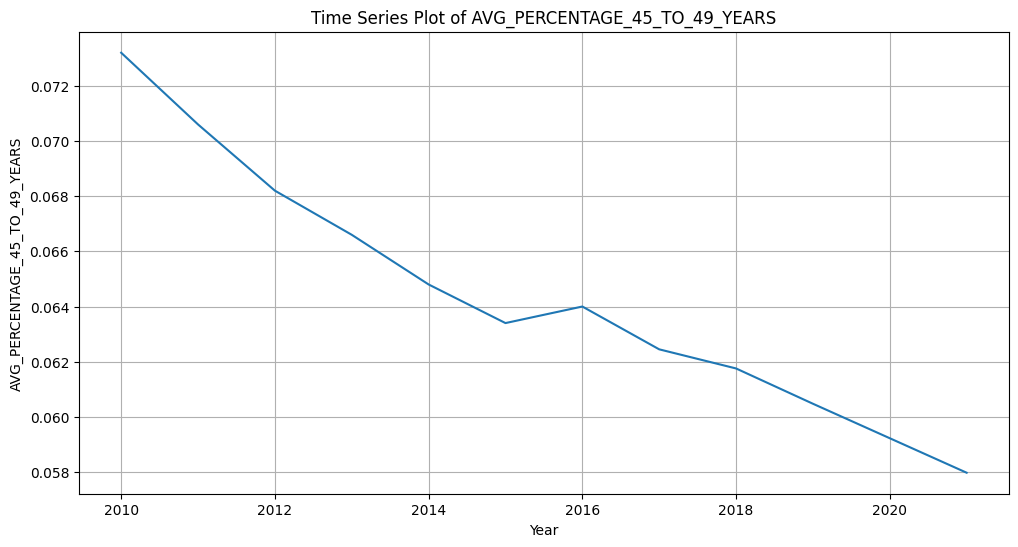

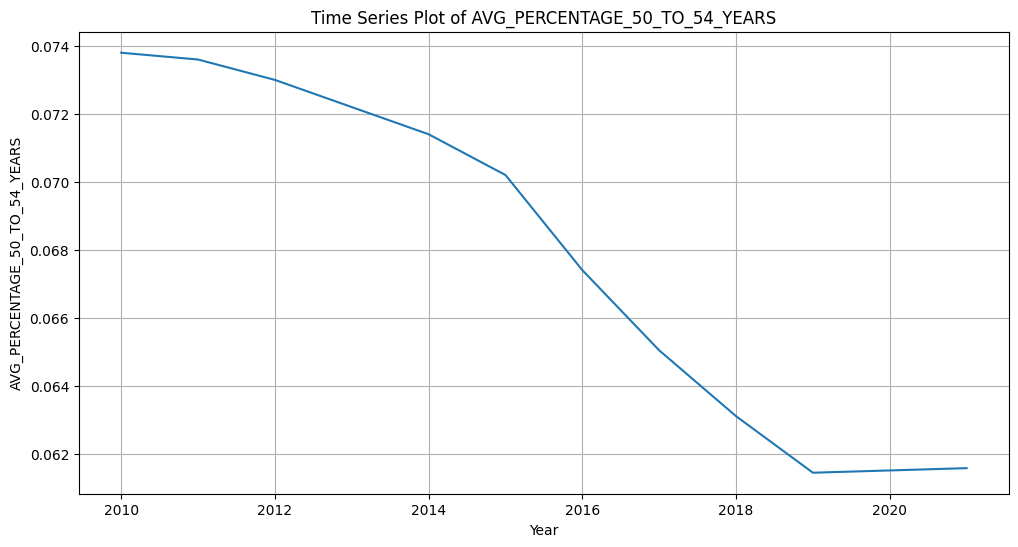

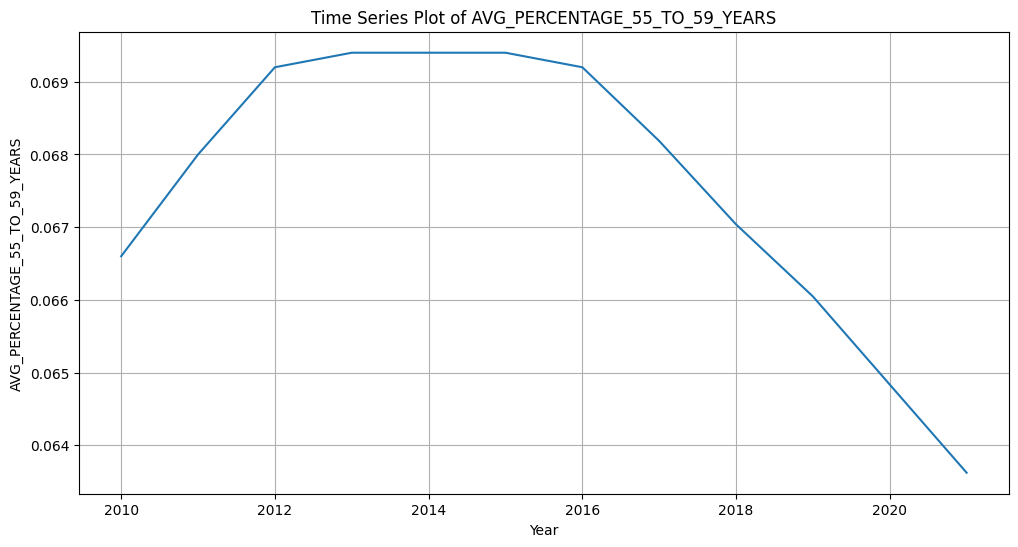

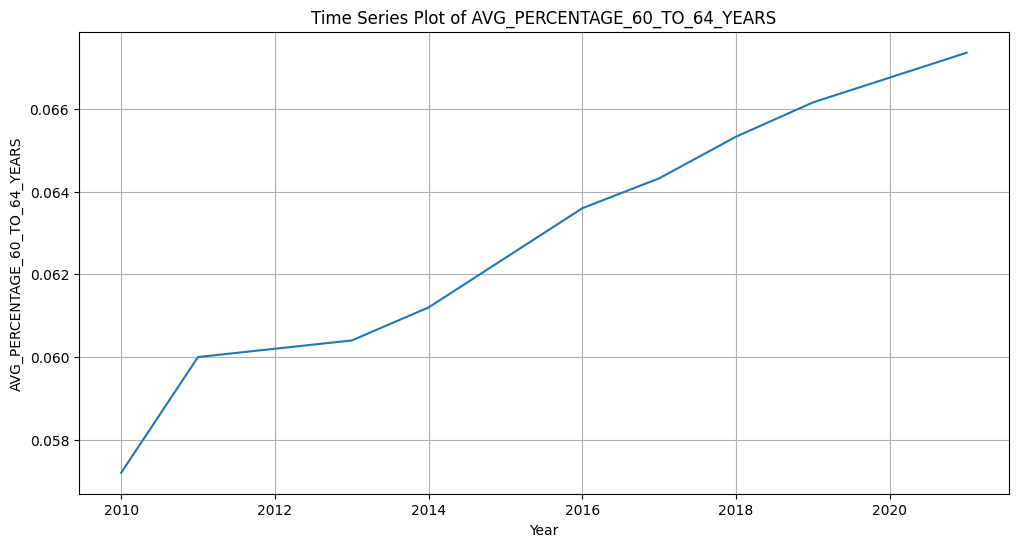

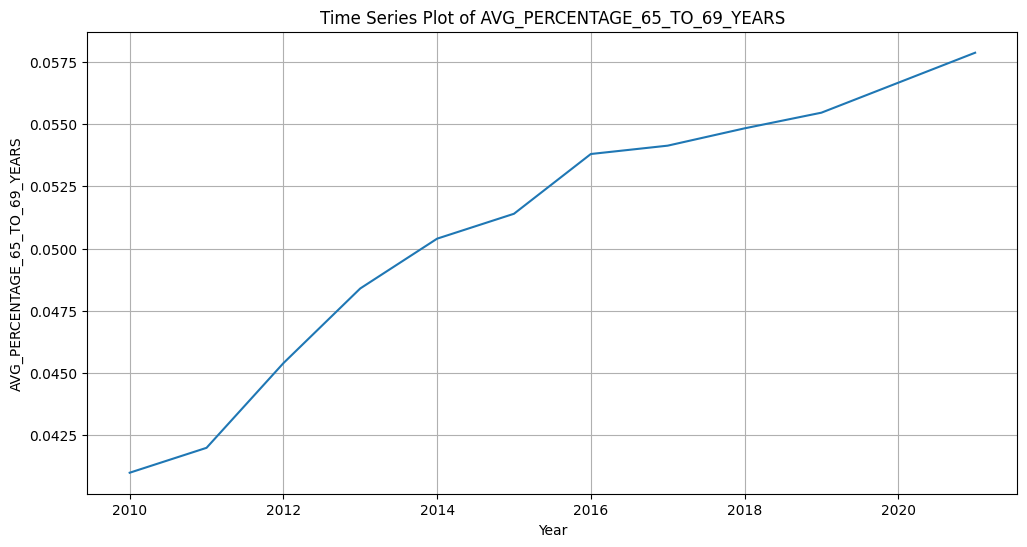

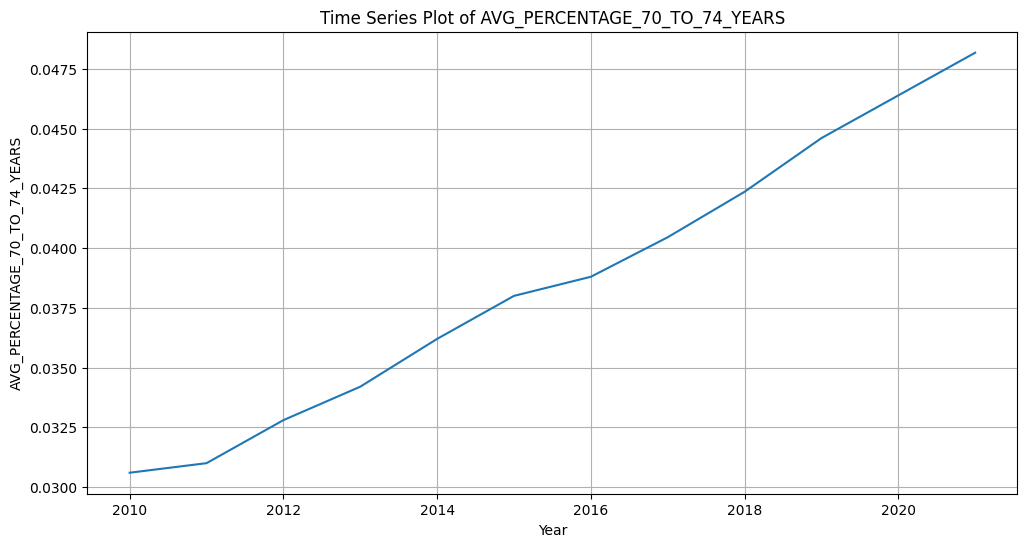

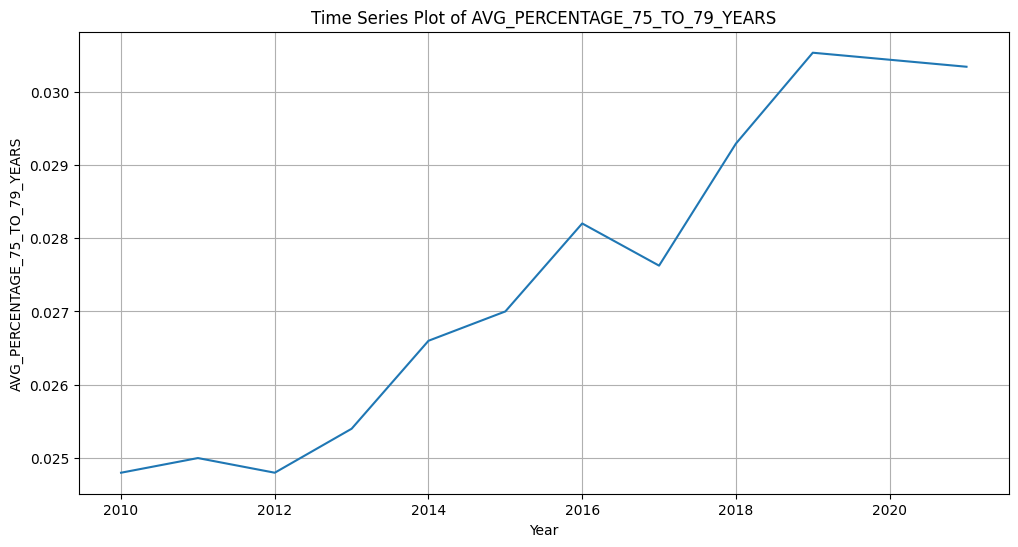

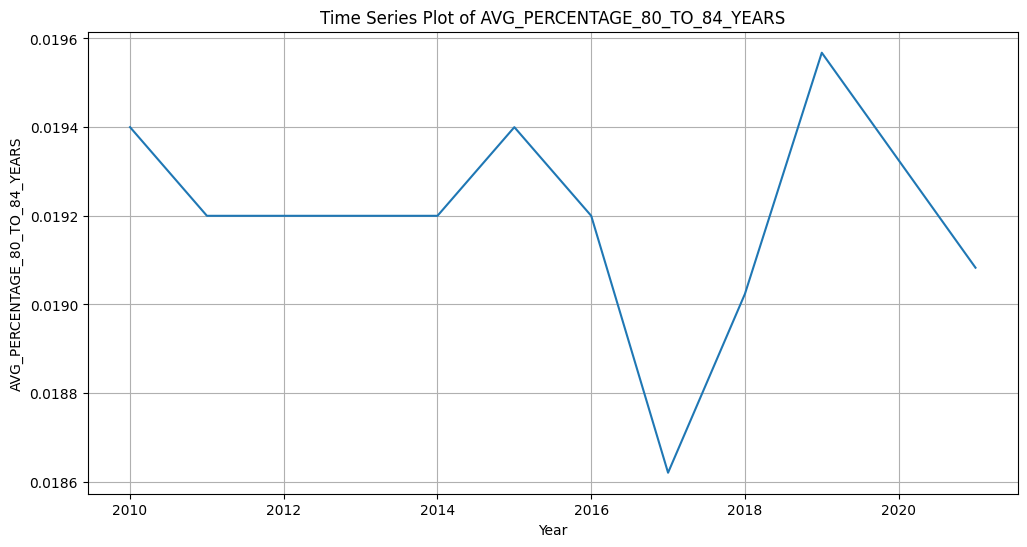

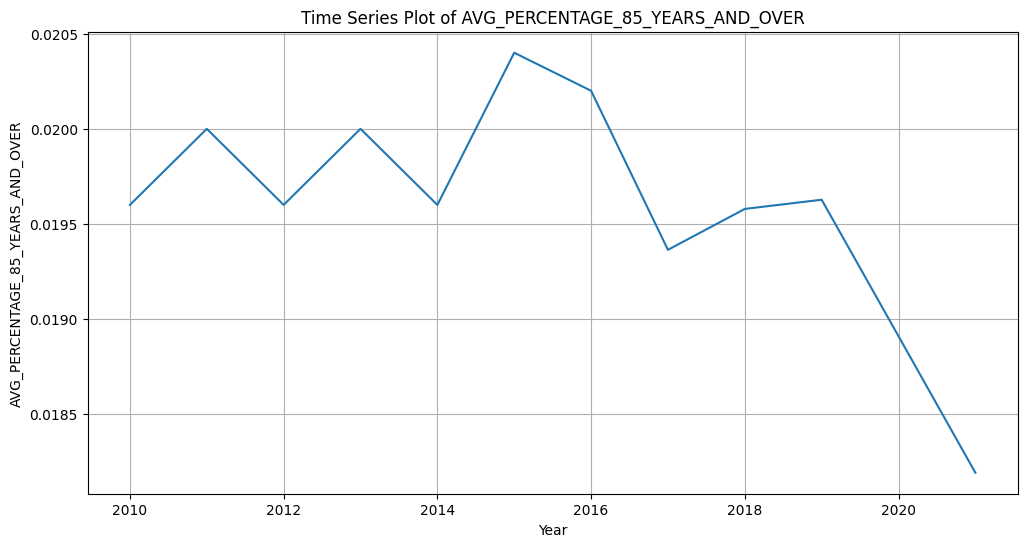

In [6]:
import matplotlib.pyplot as plt

# Create a figure for each numeric column
for column in average_by_state_full_dataset.columns:
    if column != 'YEAR':
        plt.figure(figsize=(12, 6))
        if max (average_by_state_full_dataset[column]) < 2:
            plt.plot(average_by_state_full_dataset['YEAR'], average_by_state_full_dataset[column])
        else:
            plt.plot(average_by_state_full_dataset['YEAR'], average_by_state_full_dataset[column] * 100)
        plt.title(f'Time Series Plot of {column}')
        plt.xlabel('Year')
        plt.ylabel(column)
        plt.grid(True)
plt.show()


Key observations:

Key observations:
Population and gdp seem to follow a very normal linear trend, especially if you remove the bad year from covid 2020 which feels like a reasonable thing you can do 

the surprise uptick in births make it pretty hard to guess what is coming next, expect that a large drop feels unlikely.

avg housing units is very stead which is great because we can get strong signal using that

avg housing price index feels too high, would be great if we could regress on this with more historical data

immigration seems chaotic and hard to predict

I can definitely see readible trends in age growth, will need a slightly more confisticated model to capture the wave like behavior of this

/var/folders/2l/5745d1rs293_5b5jq6sytzph0000gn/T/ipykernel_97033/2808968453.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(12, 6))


<Figure size 1200x600 with 0 Axes>

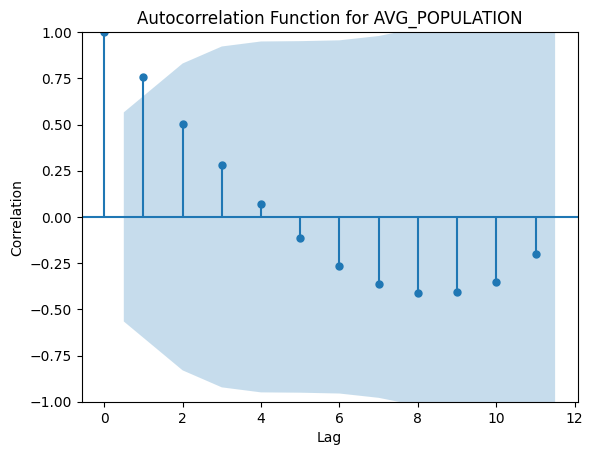

<Figure size 1200x600 with 0 Axes>

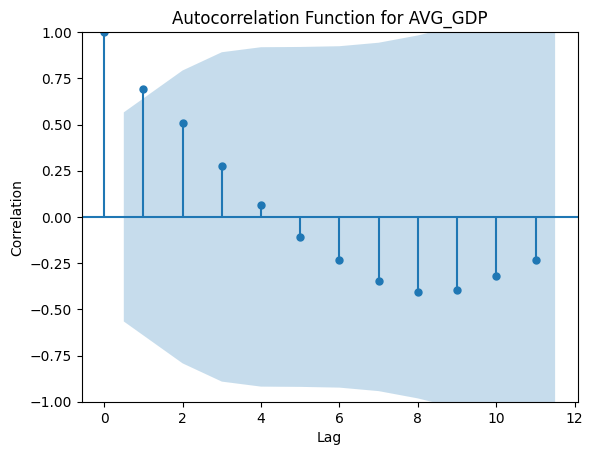

<Figure size 1200x600 with 0 Axes>

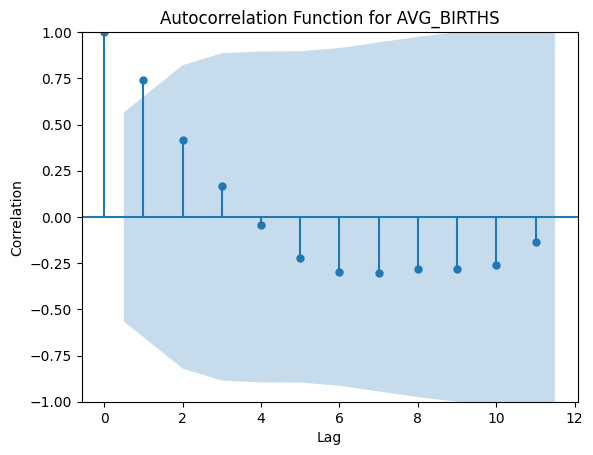

<Figure size 1200x600 with 0 Axes>

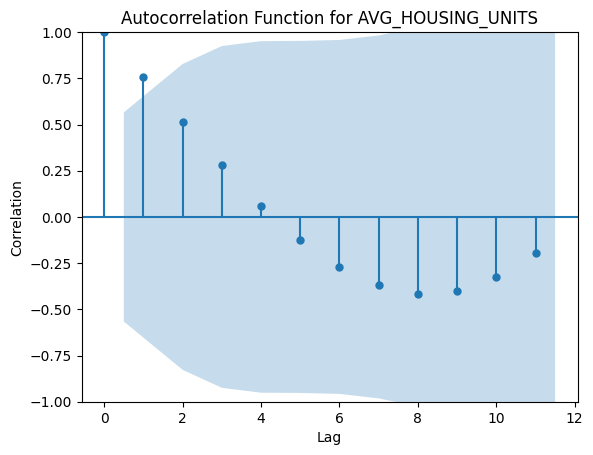

<Figure size 1200x600 with 0 Axes>

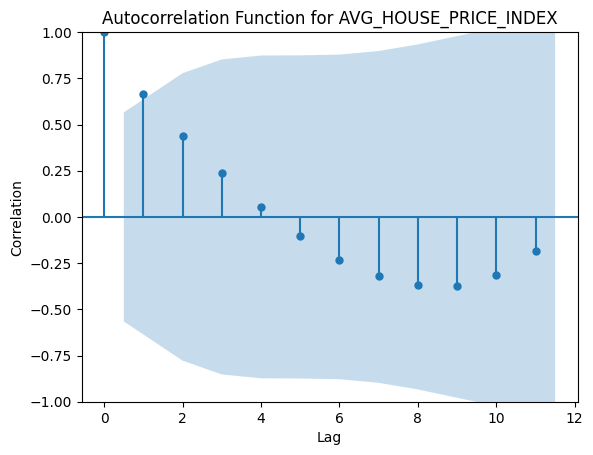

<Figure size 1200x600 with 0 Axes>

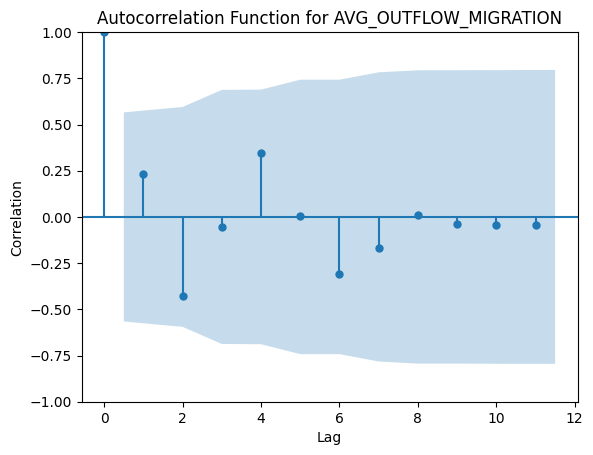

<Figure size 1200x600 with 0 Axes>

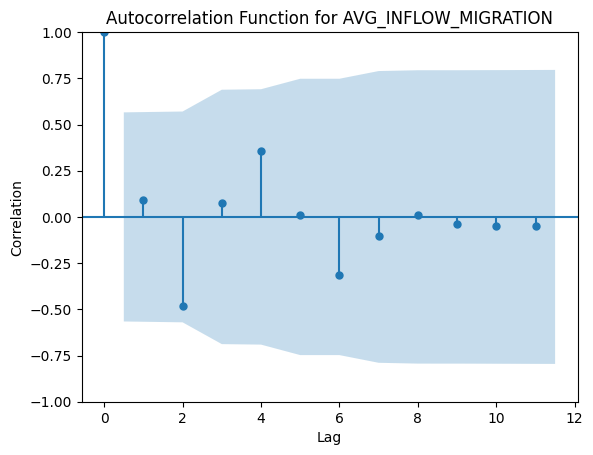

<Figure size 1200x600 with 0 Axes>

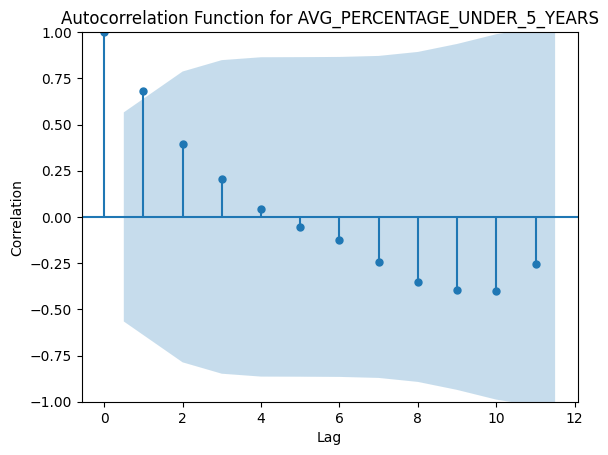

<Figure size 1200x600 with 0 Axes>

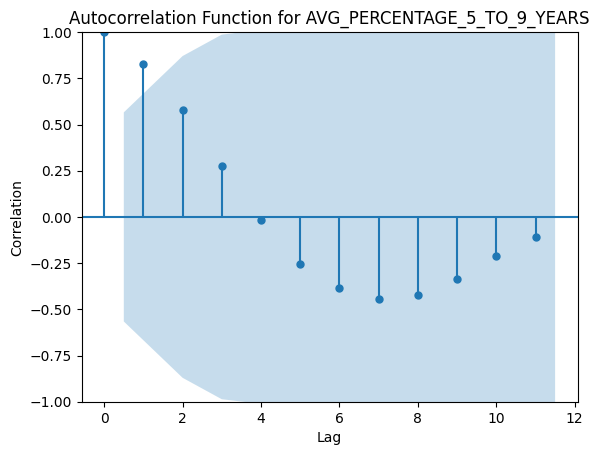

<Figure size 1200x600 with 0 Axes>

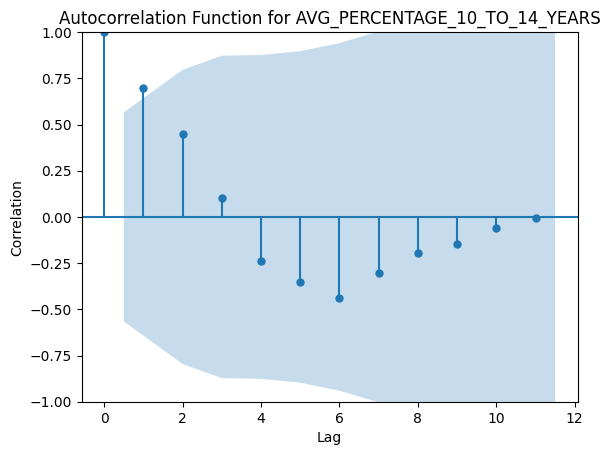

<Figure size 1200x600 with 0 Axes>

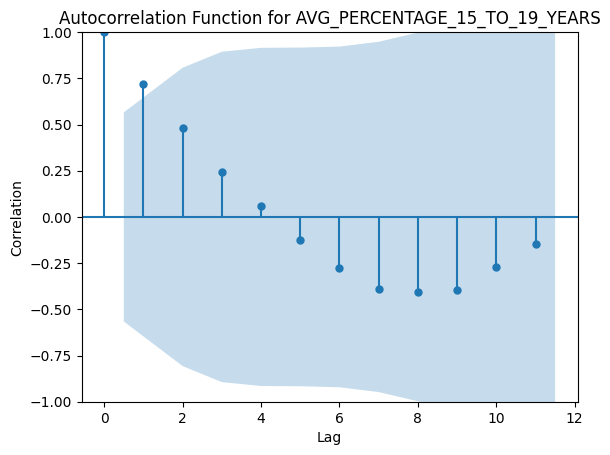

<Figure size 1200x600 with 0 Axes>

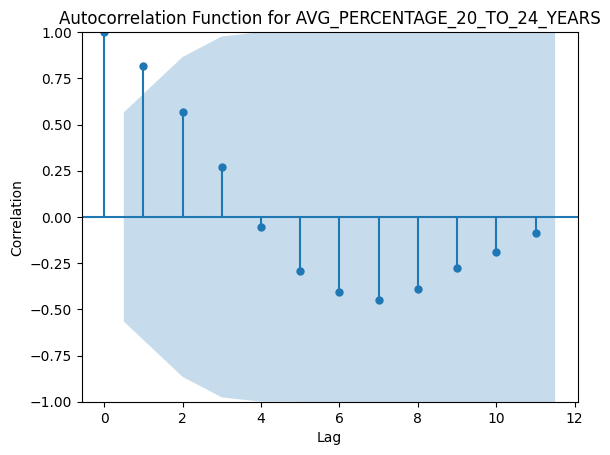

<Figure size 1200x600 with 0 Axes>

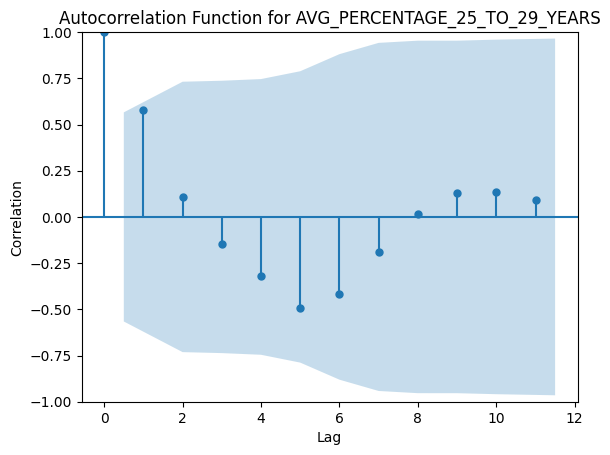

<Figure size 1200x600 with 0 Axes>

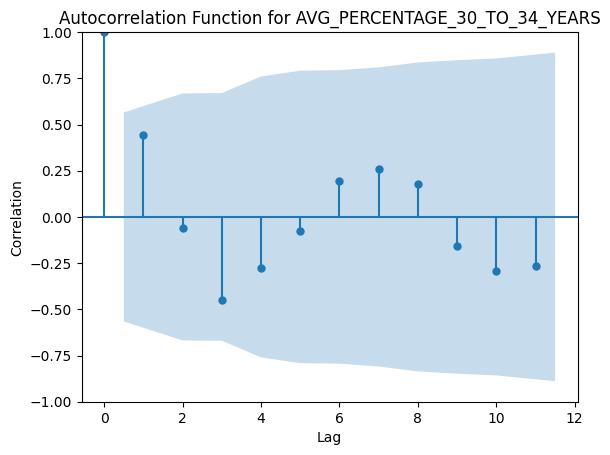

<Figure size 1200x600 with 0 Axes>

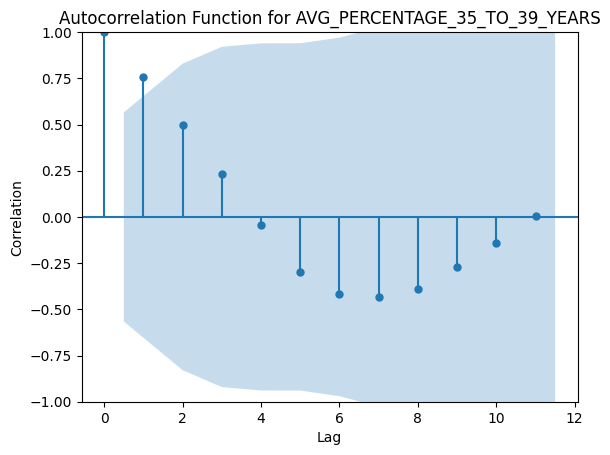

<Figure size 1200x600 with 0 Axes>

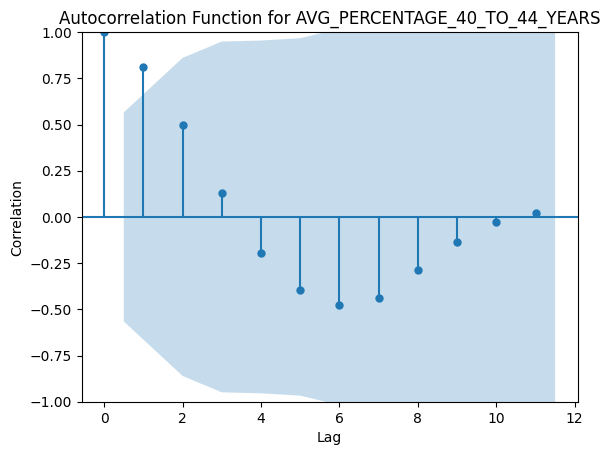

<Figure size 1200x600 with 0 Axes>

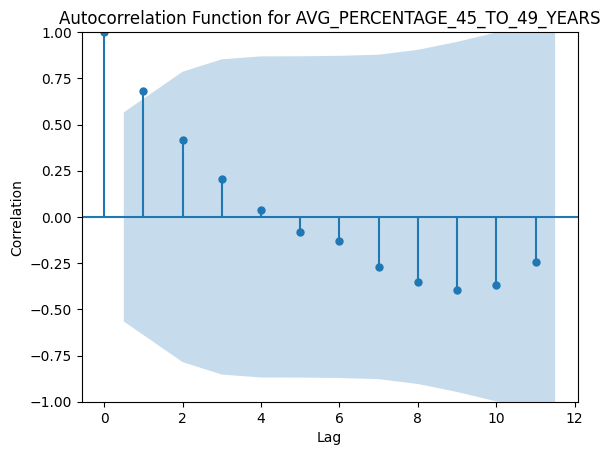

<Figure size 1200x600 with 0 Axes>

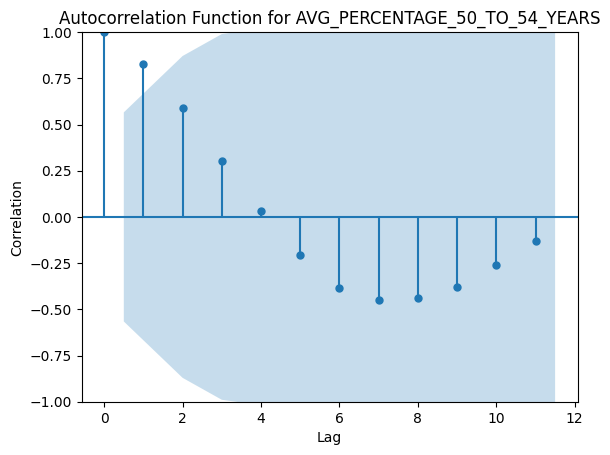

<Figure size 1200x600 with 0 Axes>

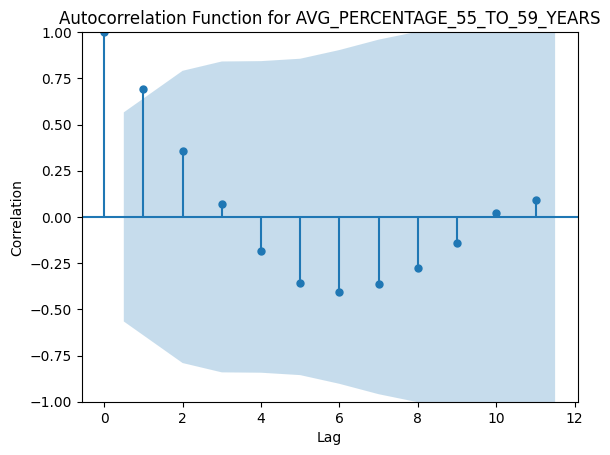

<Figure size 1200x600 with 0 Axes>

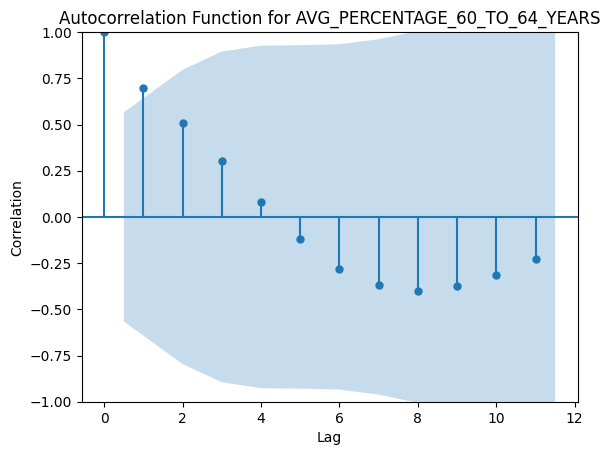

<Figure size 1200x600 with 0 Axes>

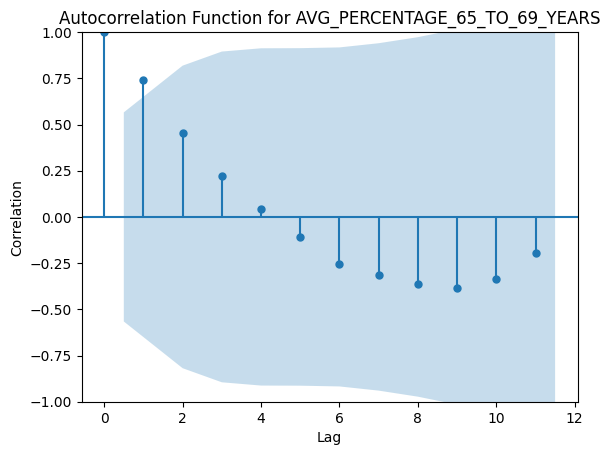

<Figure size 1200x600 with 0 Axes>

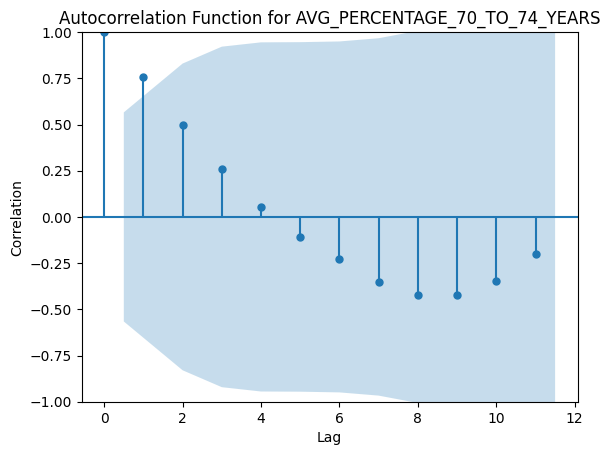

<Figure size 1200x600 with 0 Axes>

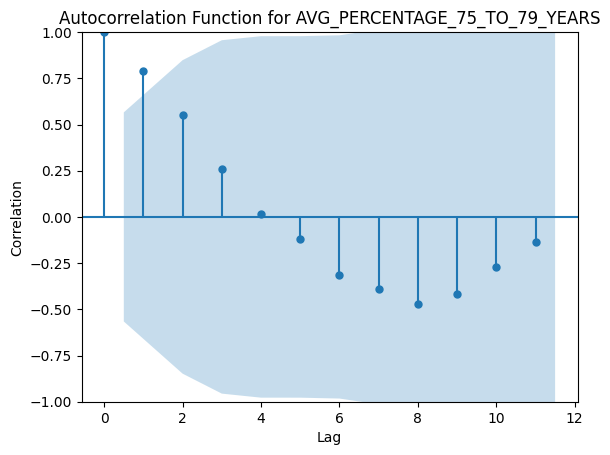

<Figure size 1200x600 with 0 Axes>

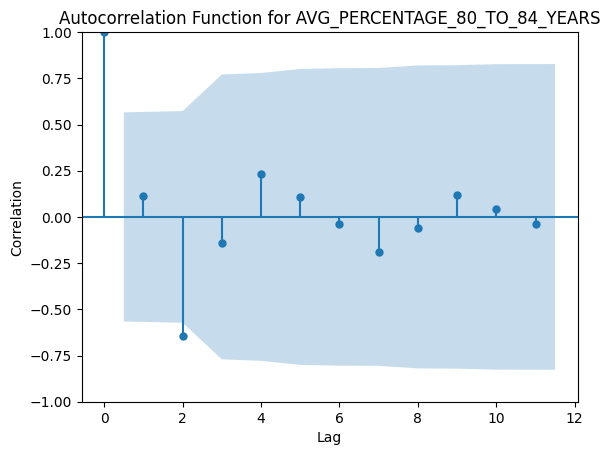

<Figure size 1200x600 with 0 Axes>

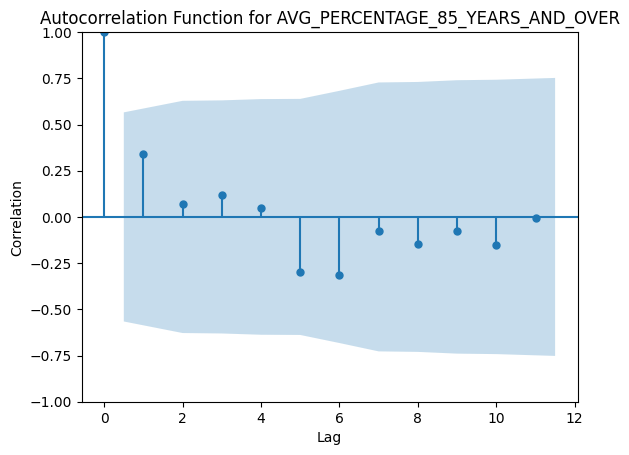

In [7]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

for column in average_by_state_full_dataset.columns:
    if column != 'YEAR':
        plt.figure(figsize=(12, 6))
        plot_acf(average_by_state_full_dataset[column], lags=11)
        plt.title(f'Autocorrelation Function for {column}')
        plt.xlabel('Lag')
        plt.ylabel('Correlation')
plt.show()


Key observations:

Really strong signal in population and gdp, as expected
less strong but still strong avg birth, should be more related to shorter lags so that's looking good
strong correlation for housing units and housing price
Very little correlation with migration, probably useless data, not that surprising
For population distributions, strangely low correlation for 25 to 35 age range, I wonder if there is a differencing technique we can use to fix that?
Very low correlation for 80 to 85, not that surprising given the randomness deaths introduce

Idea: can probably find a high autocorrelation of five years between the age groups as those demographis literally turn into each other every 5 years


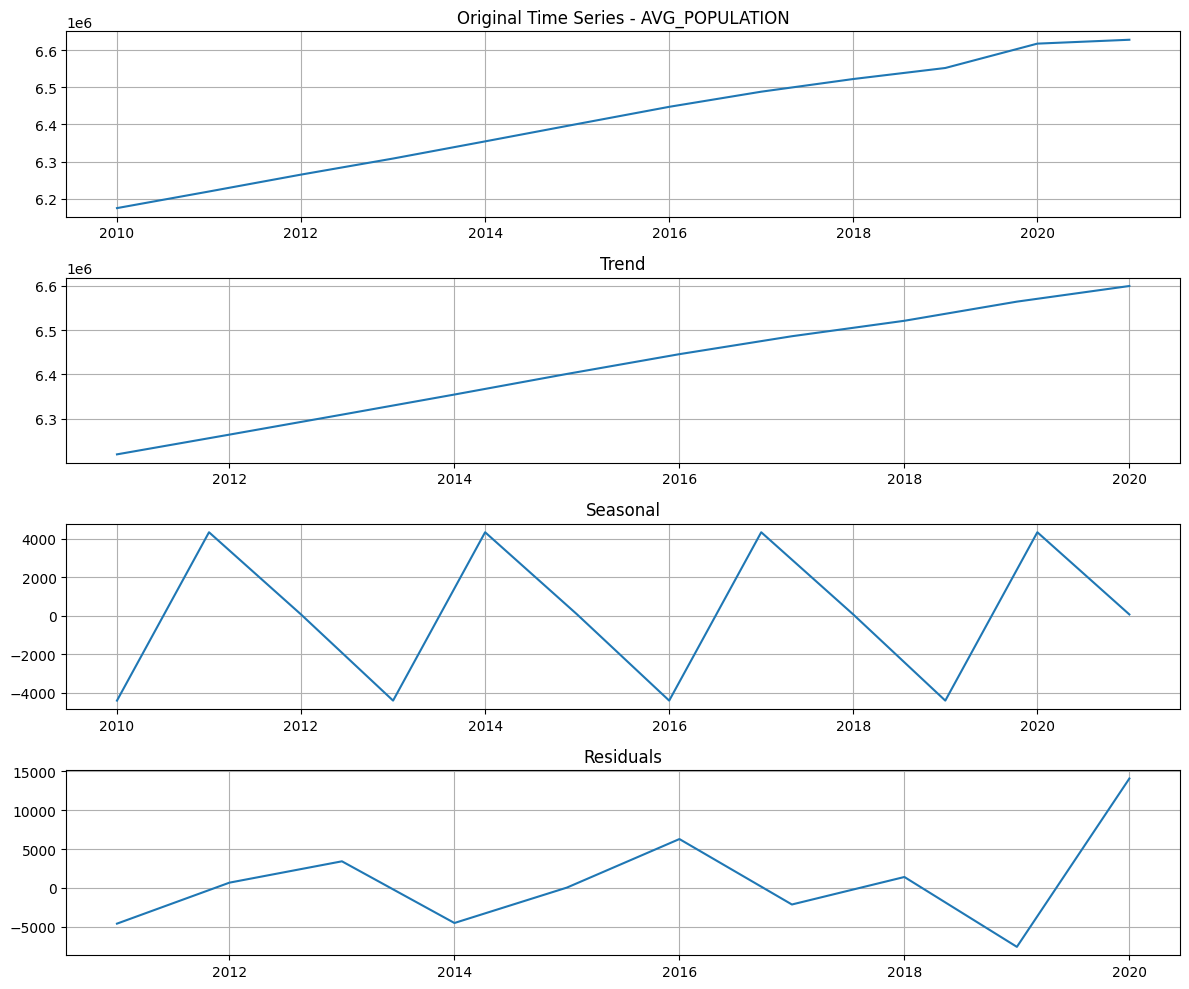

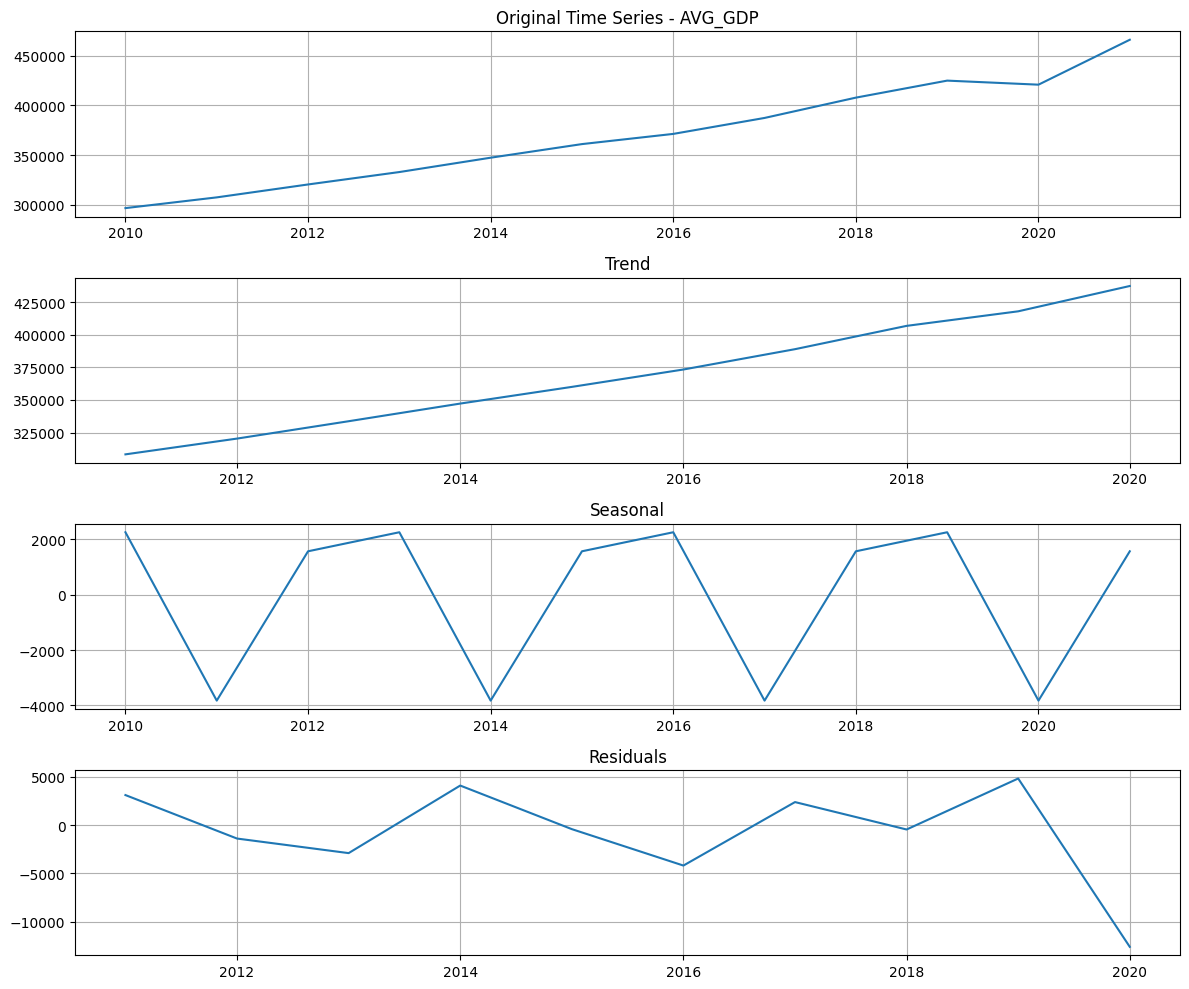

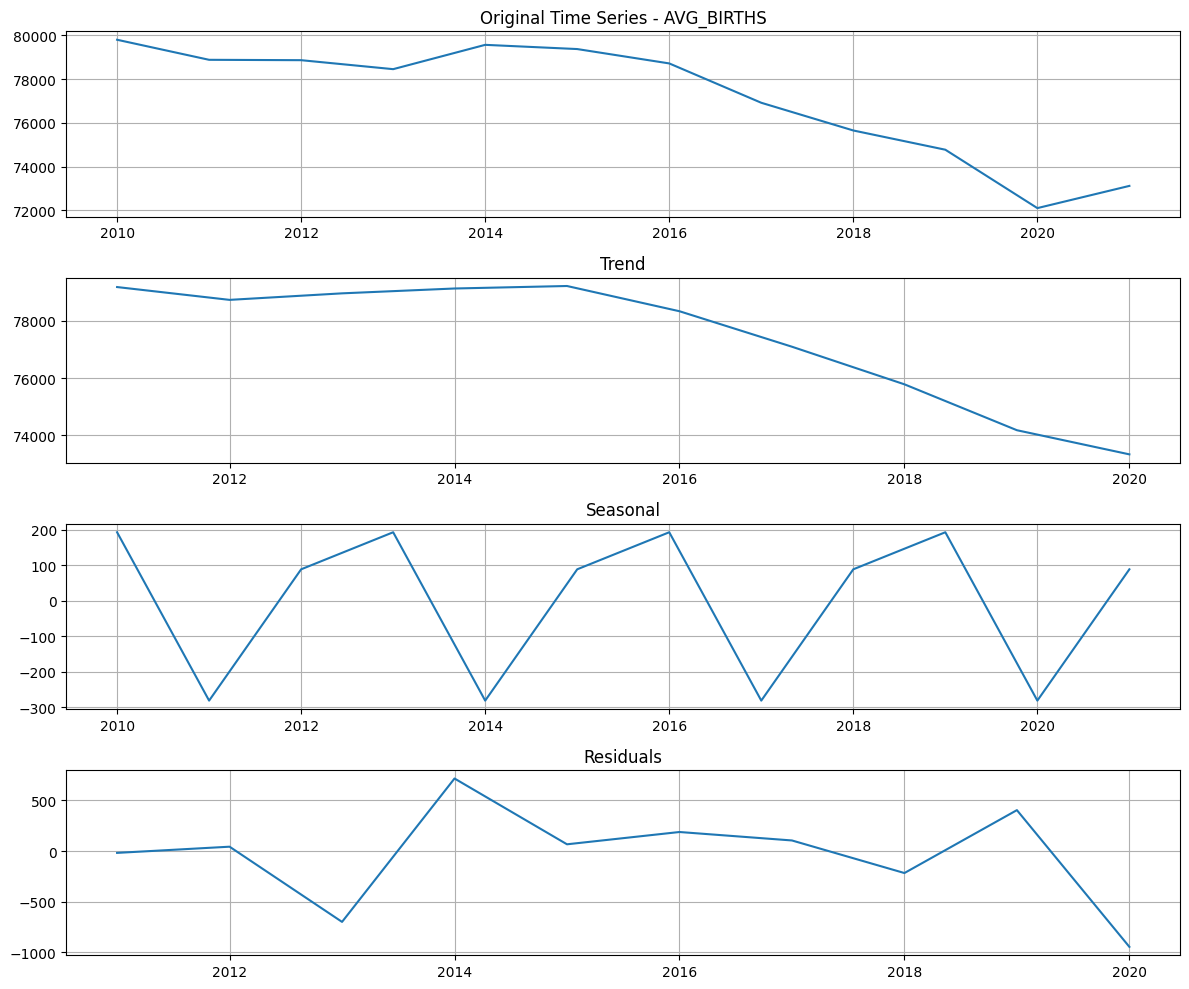

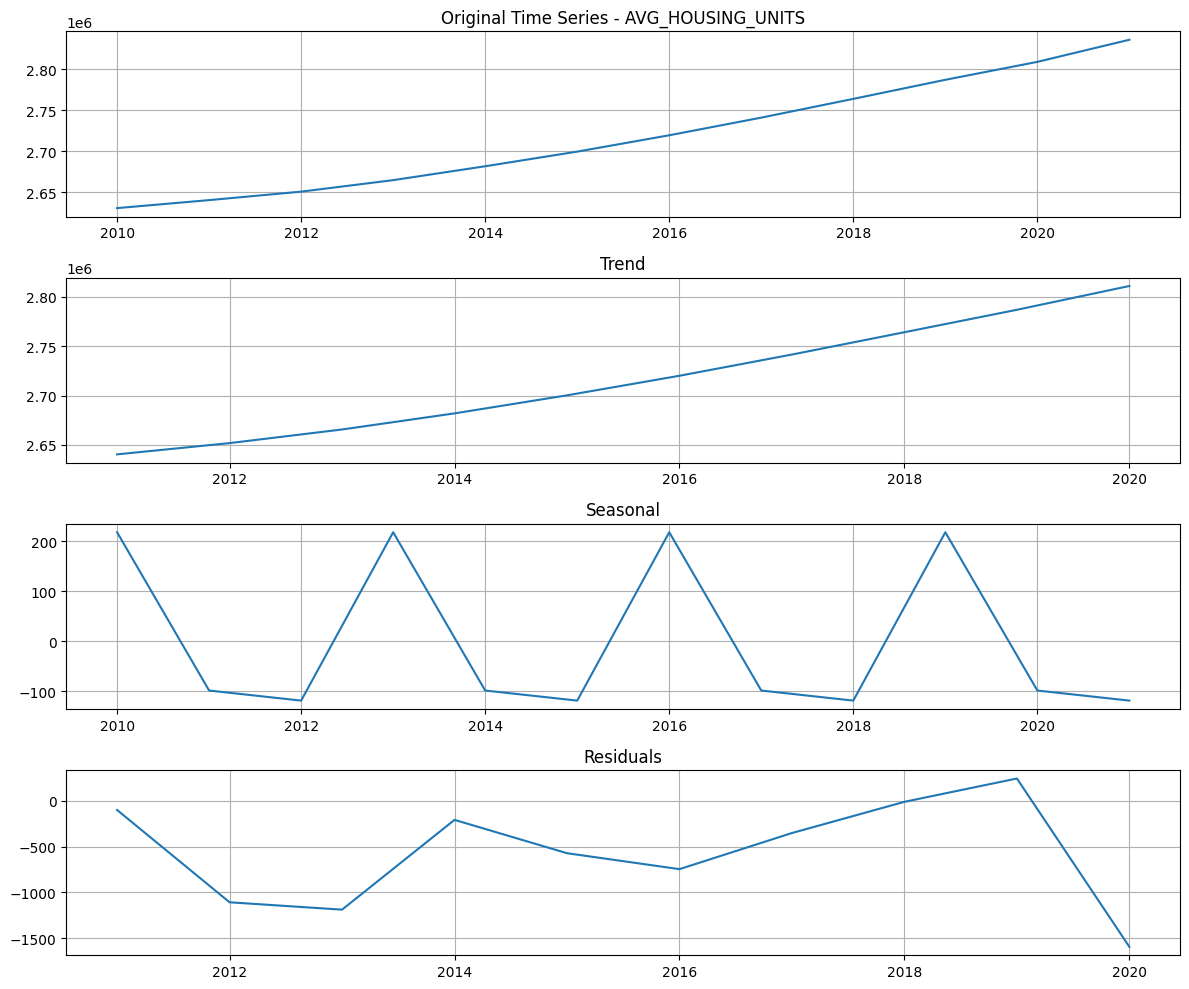

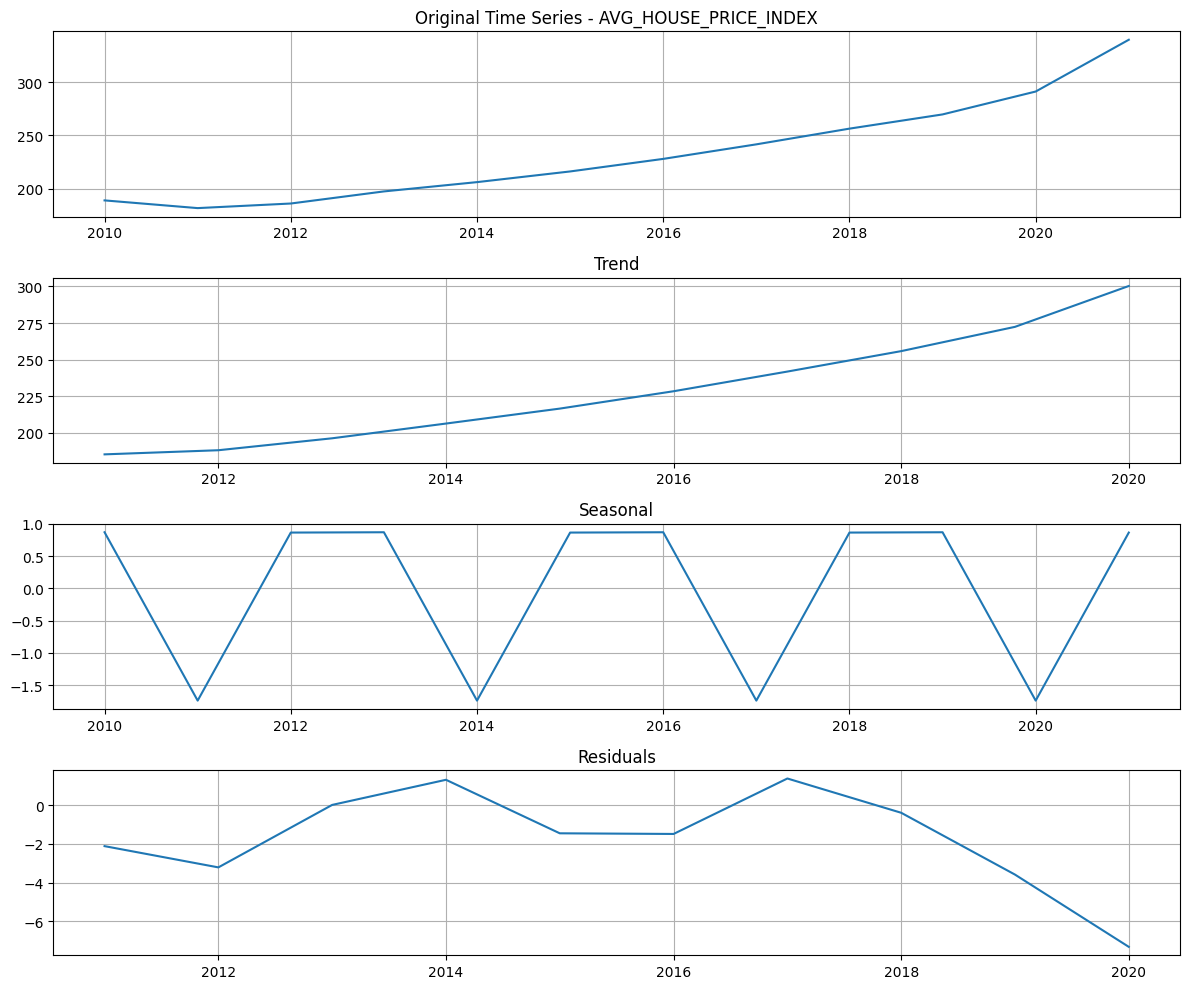

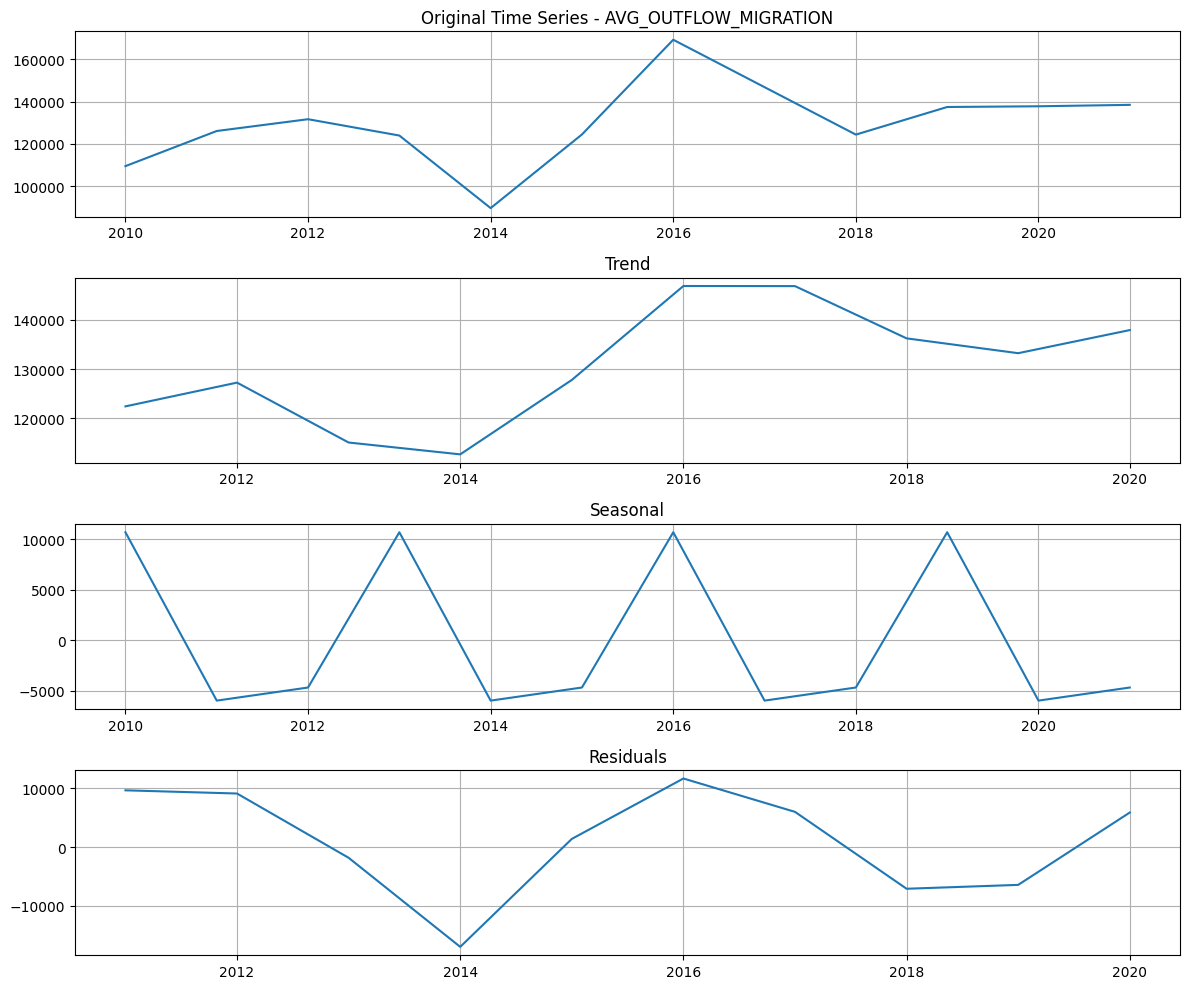

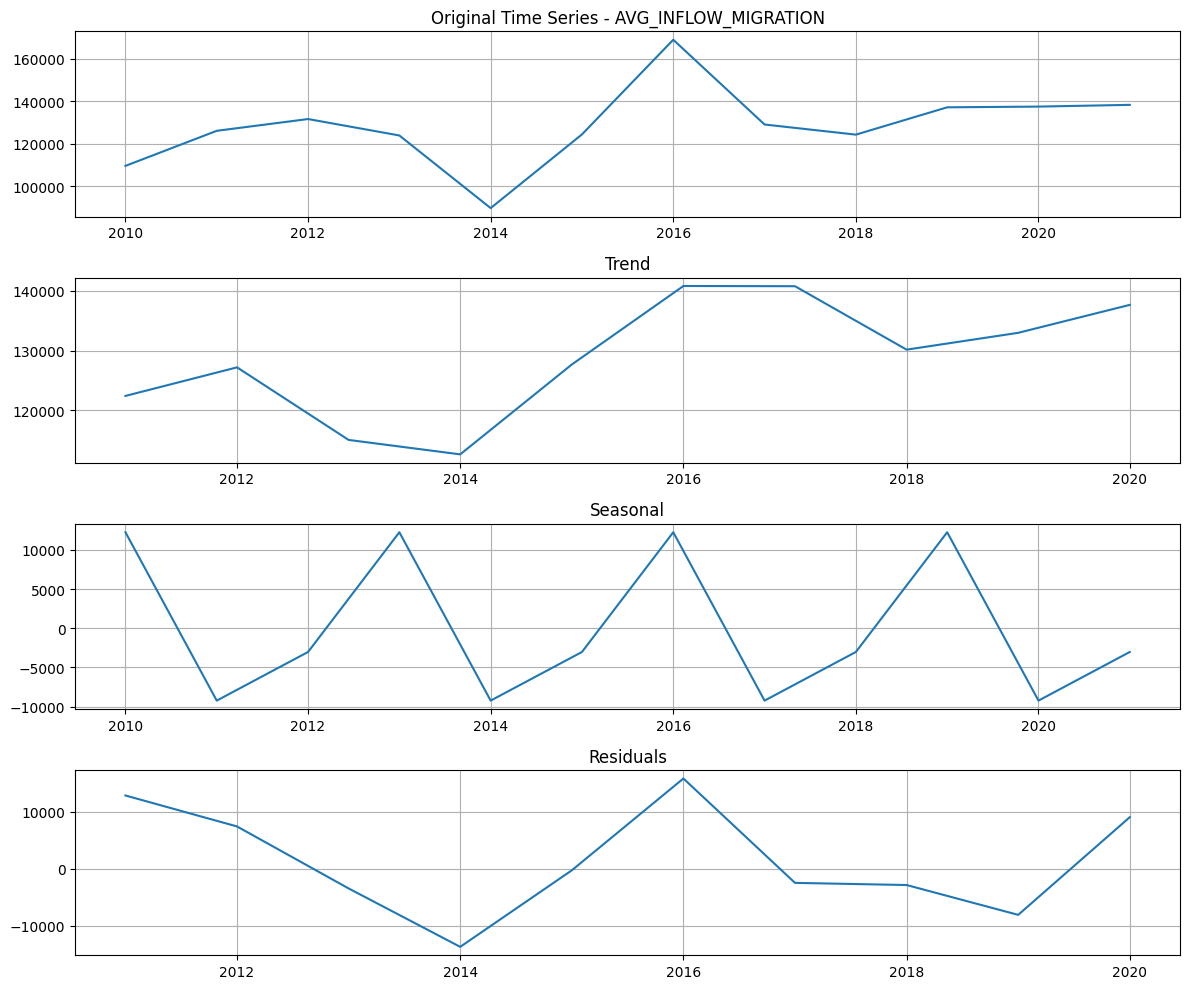

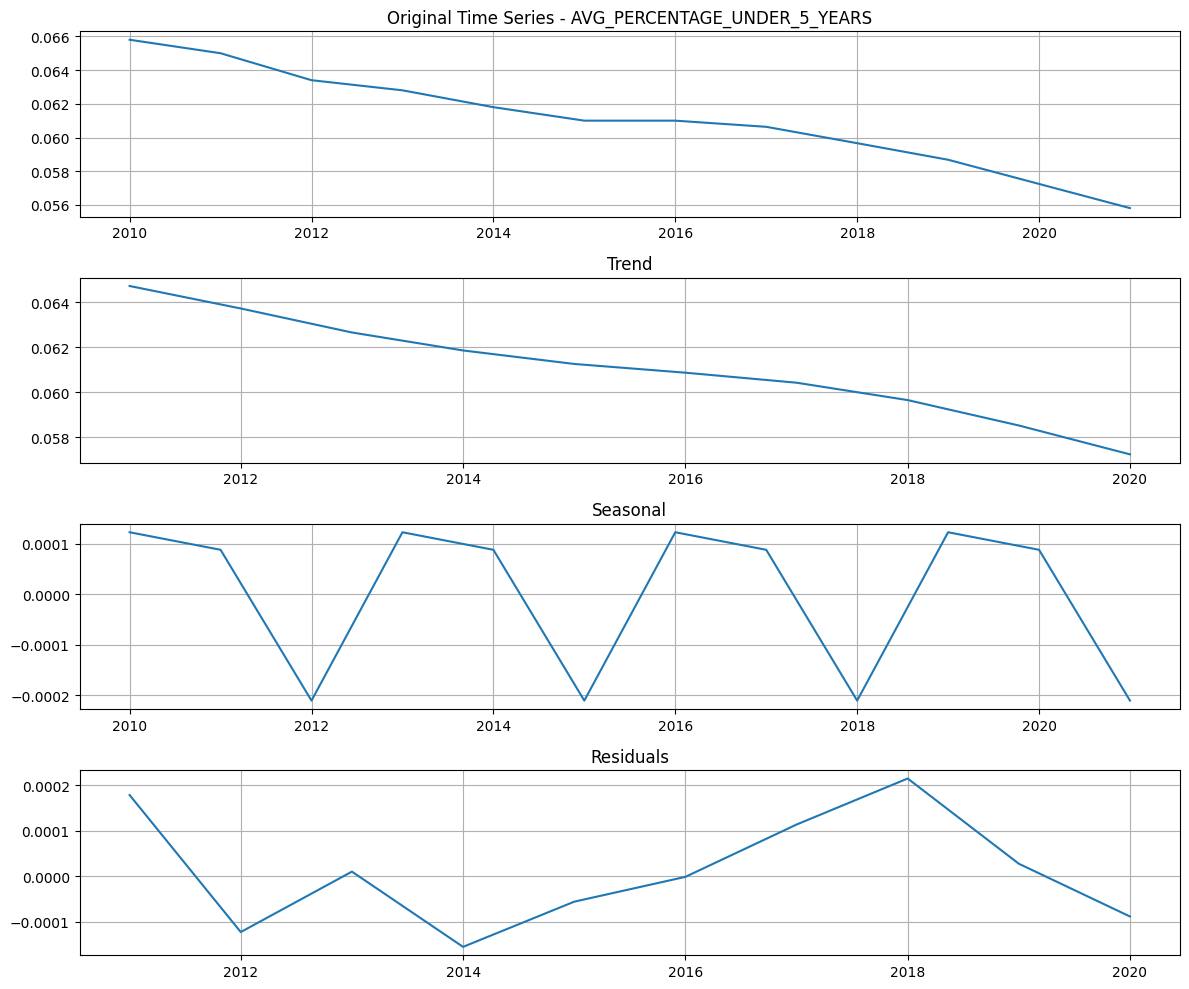

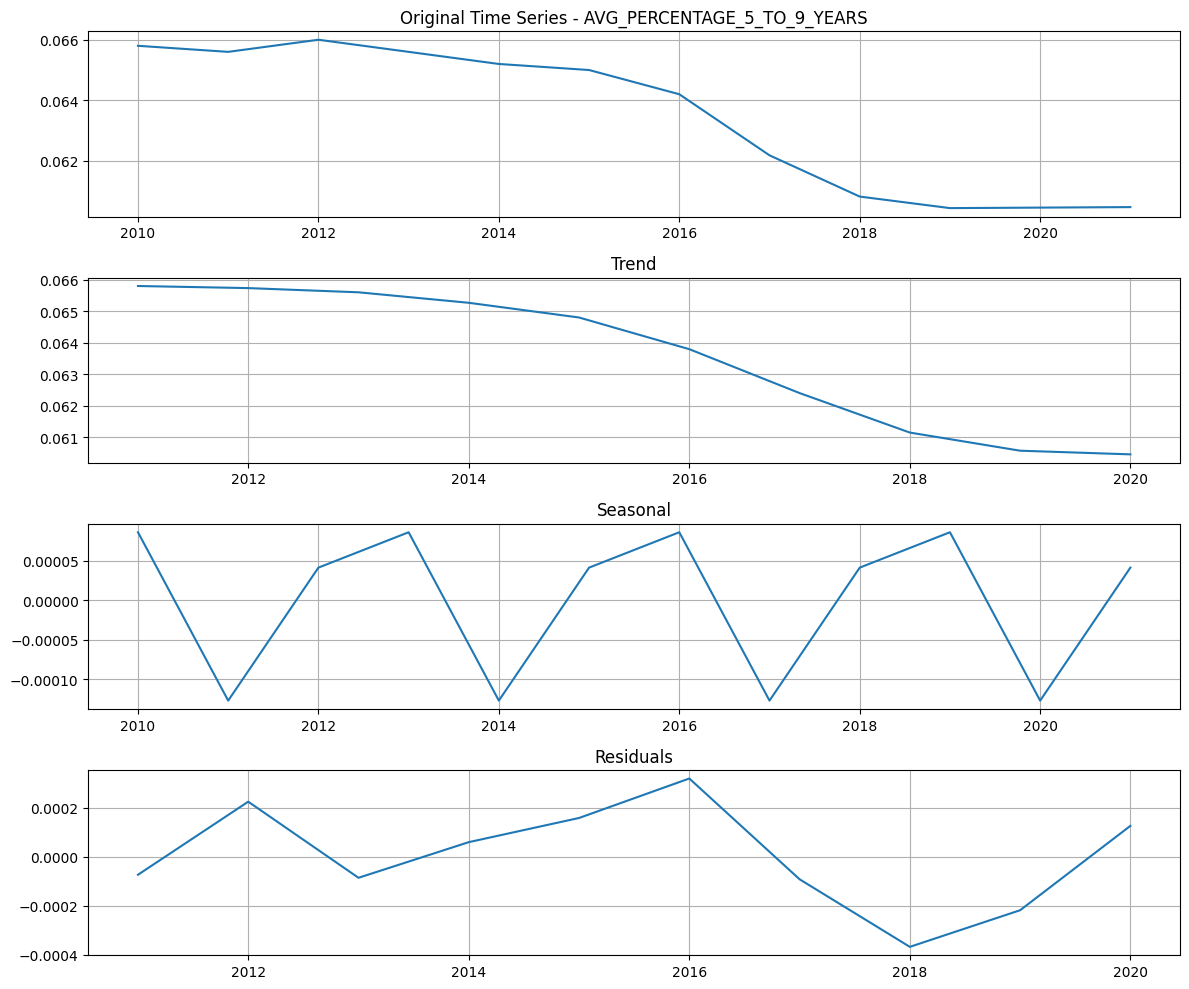

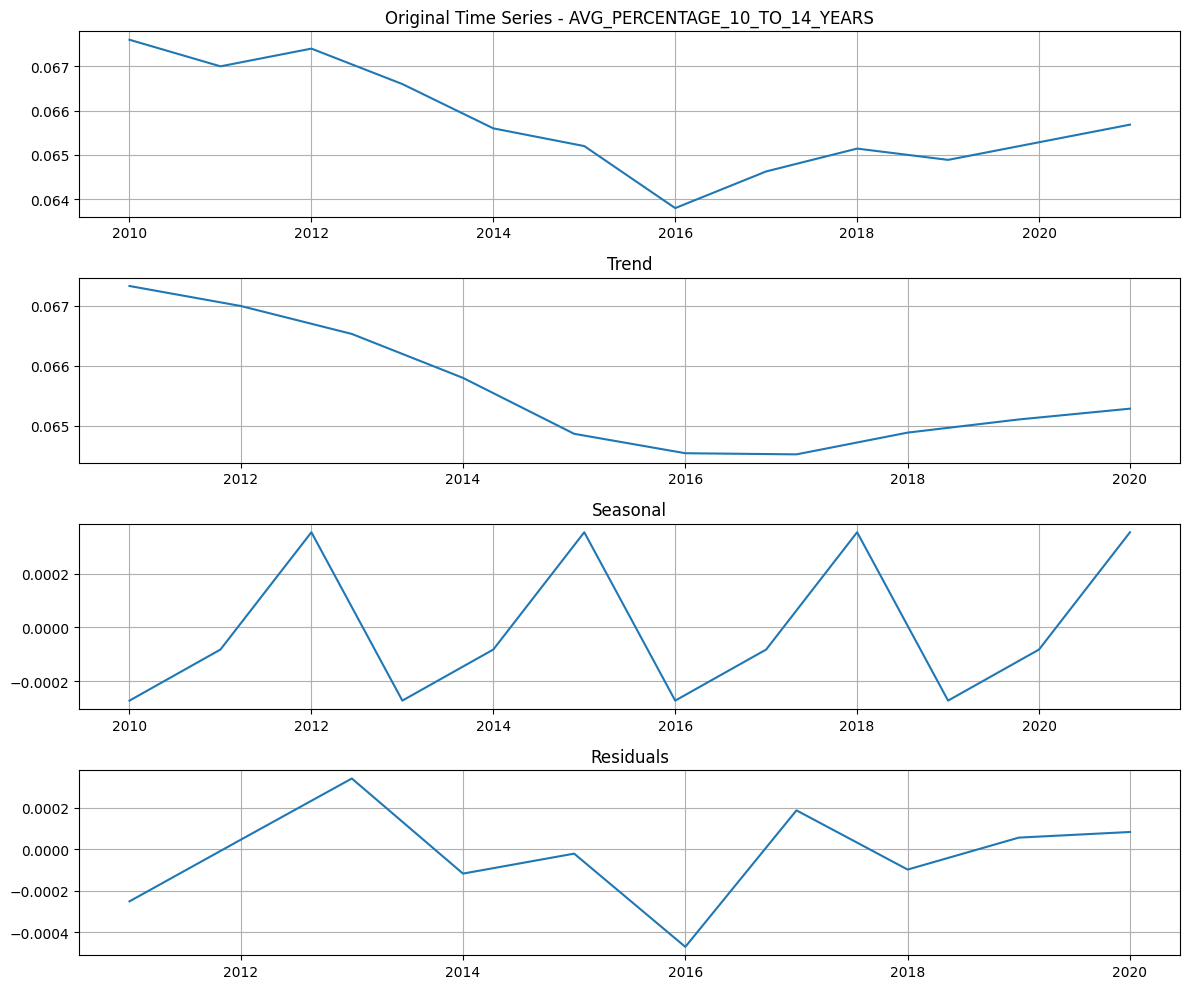

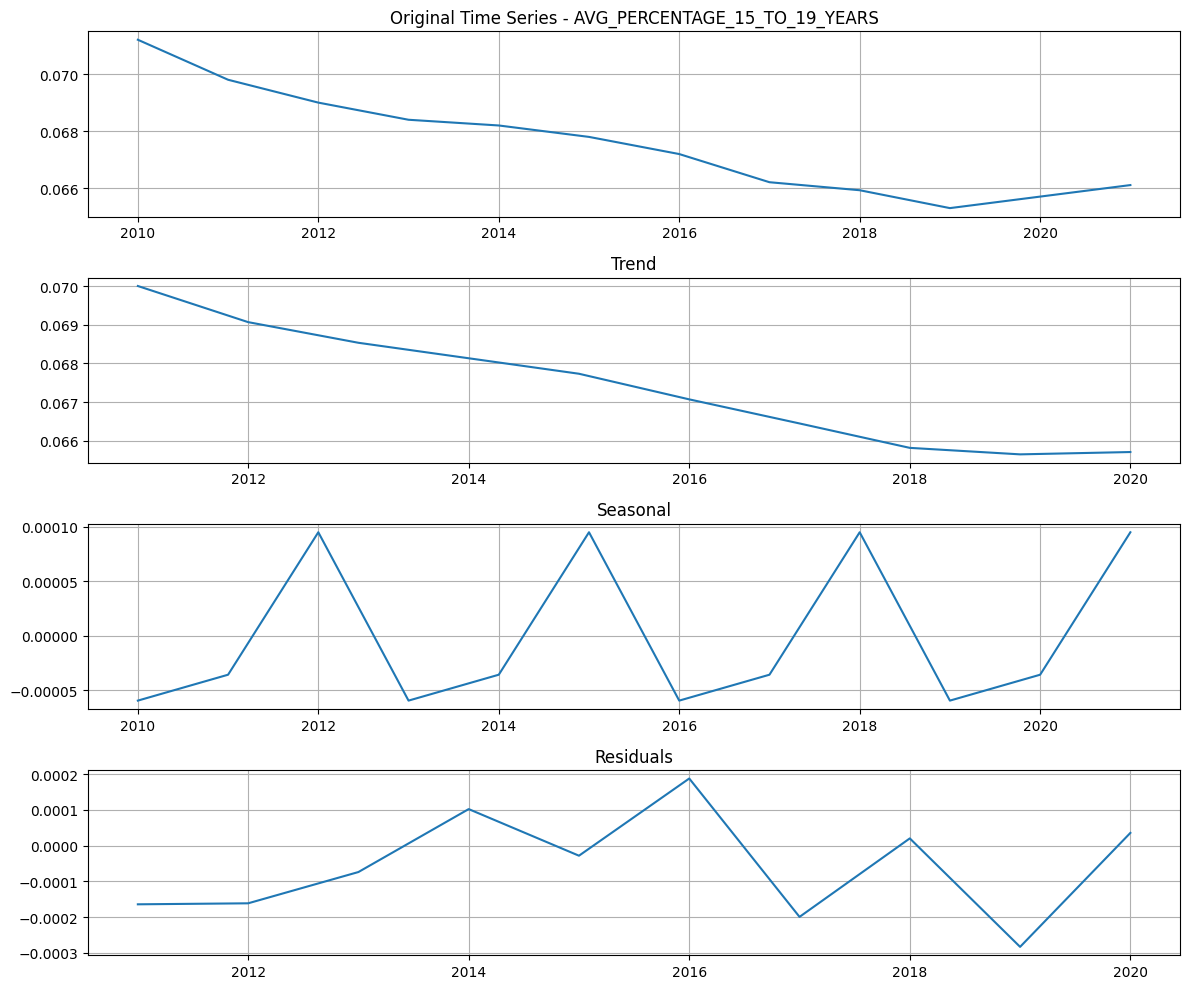

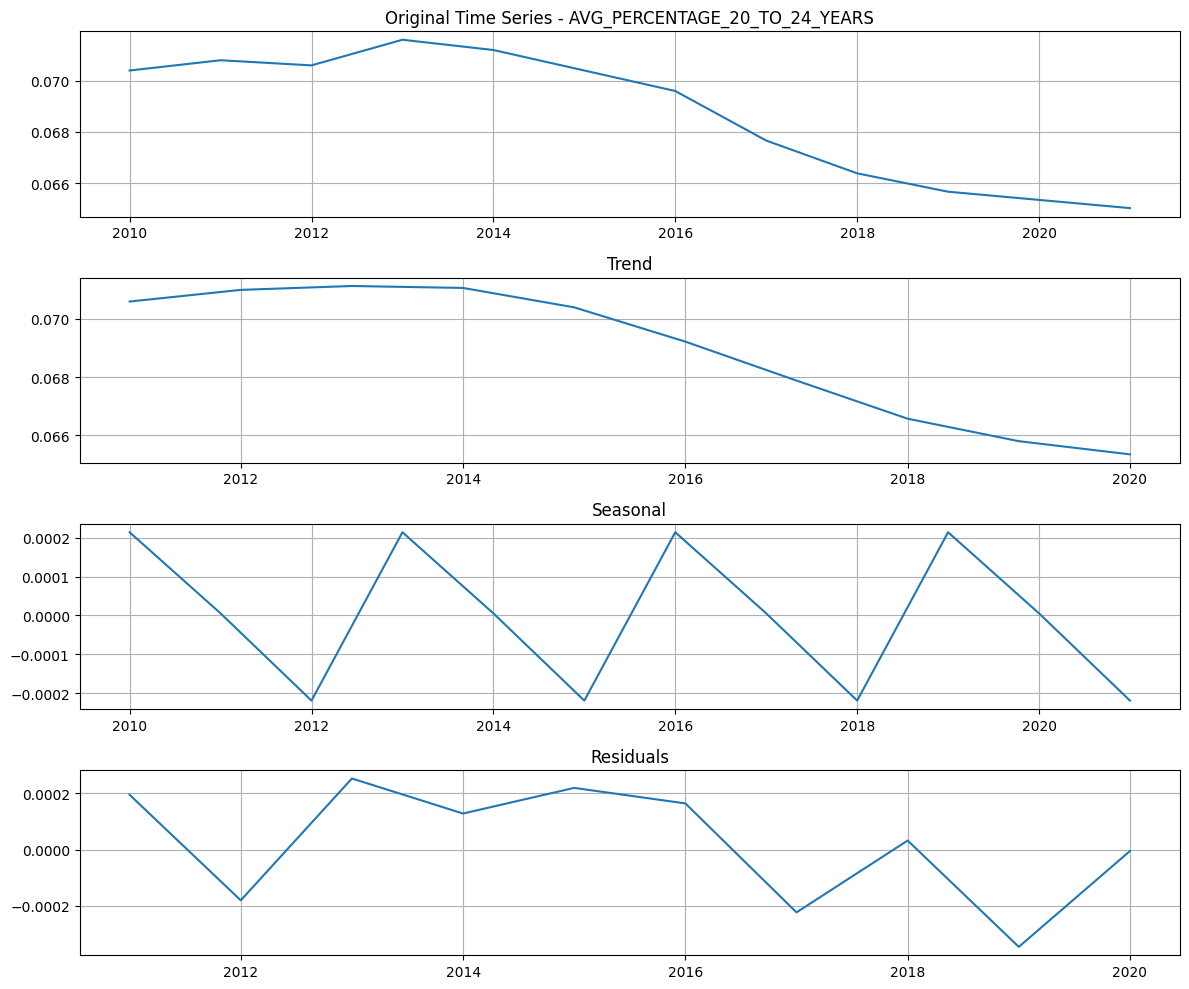

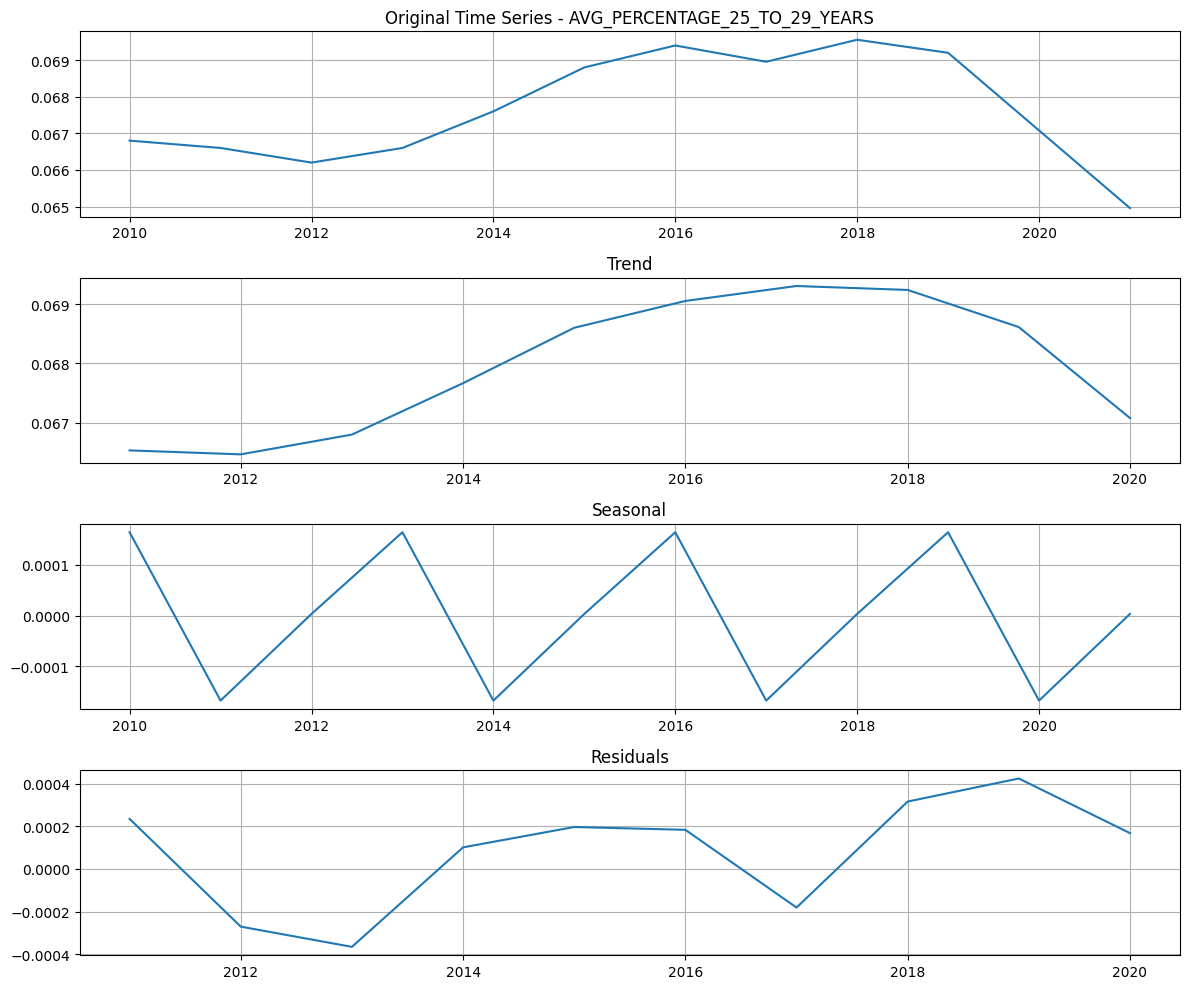

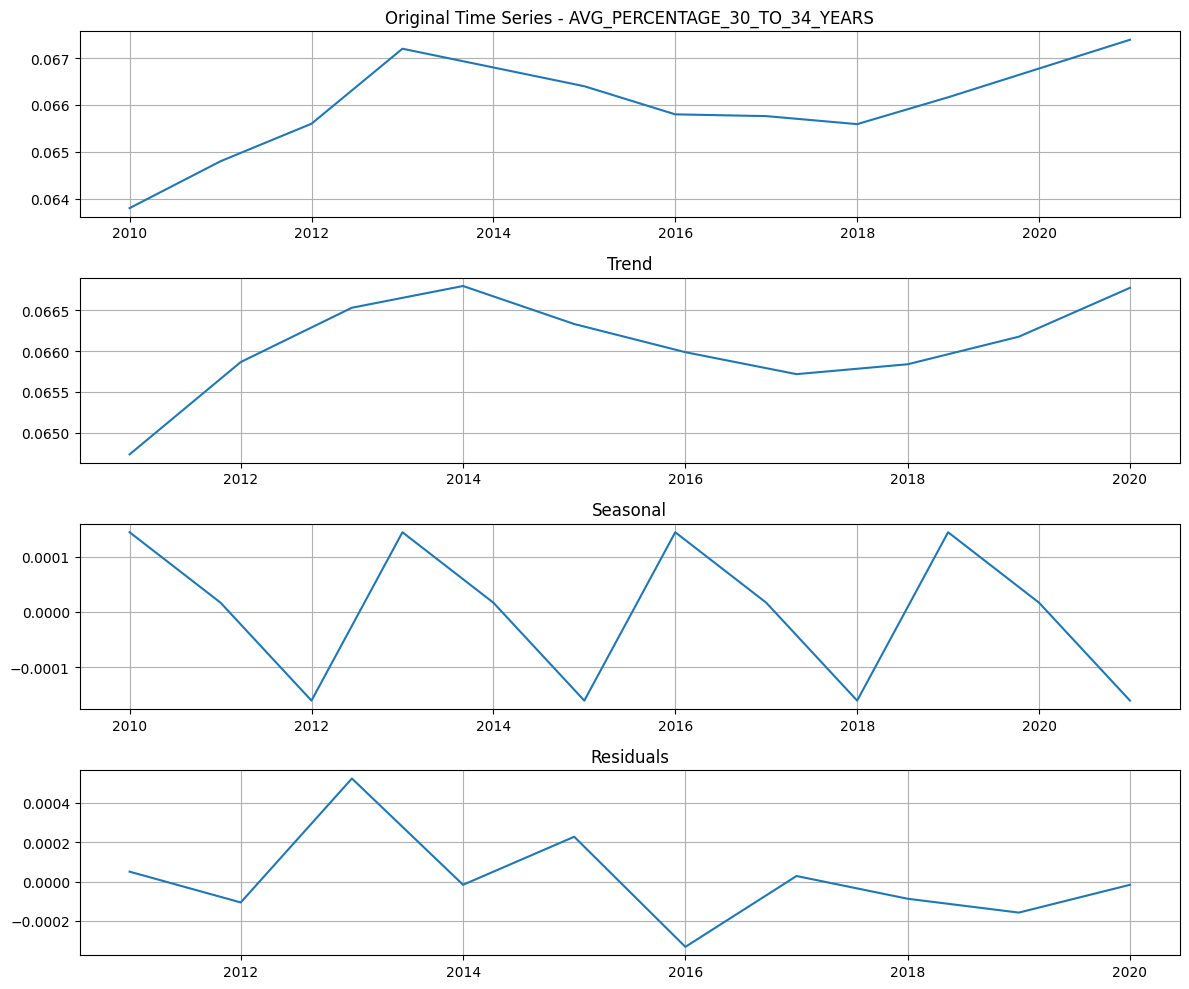

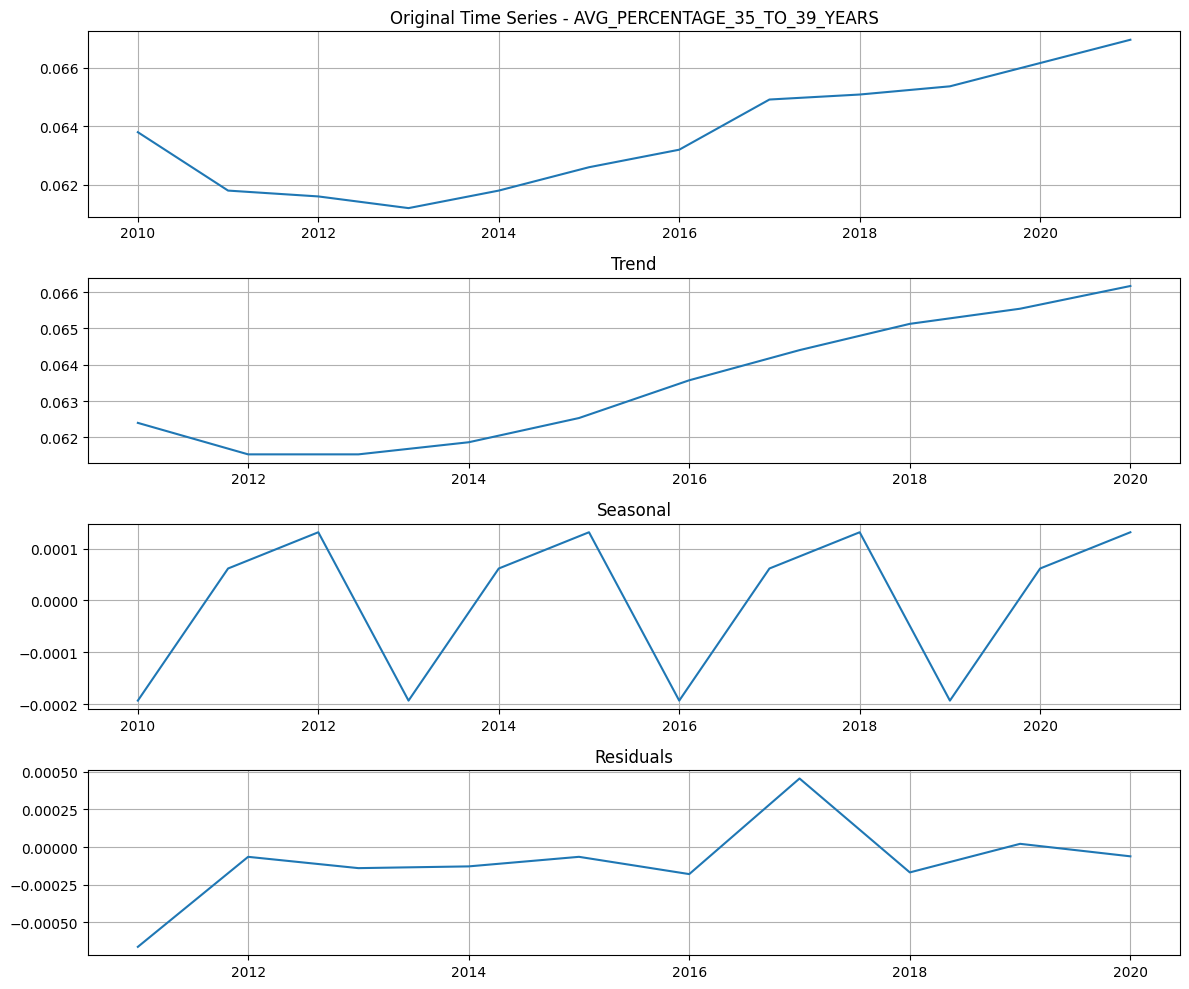

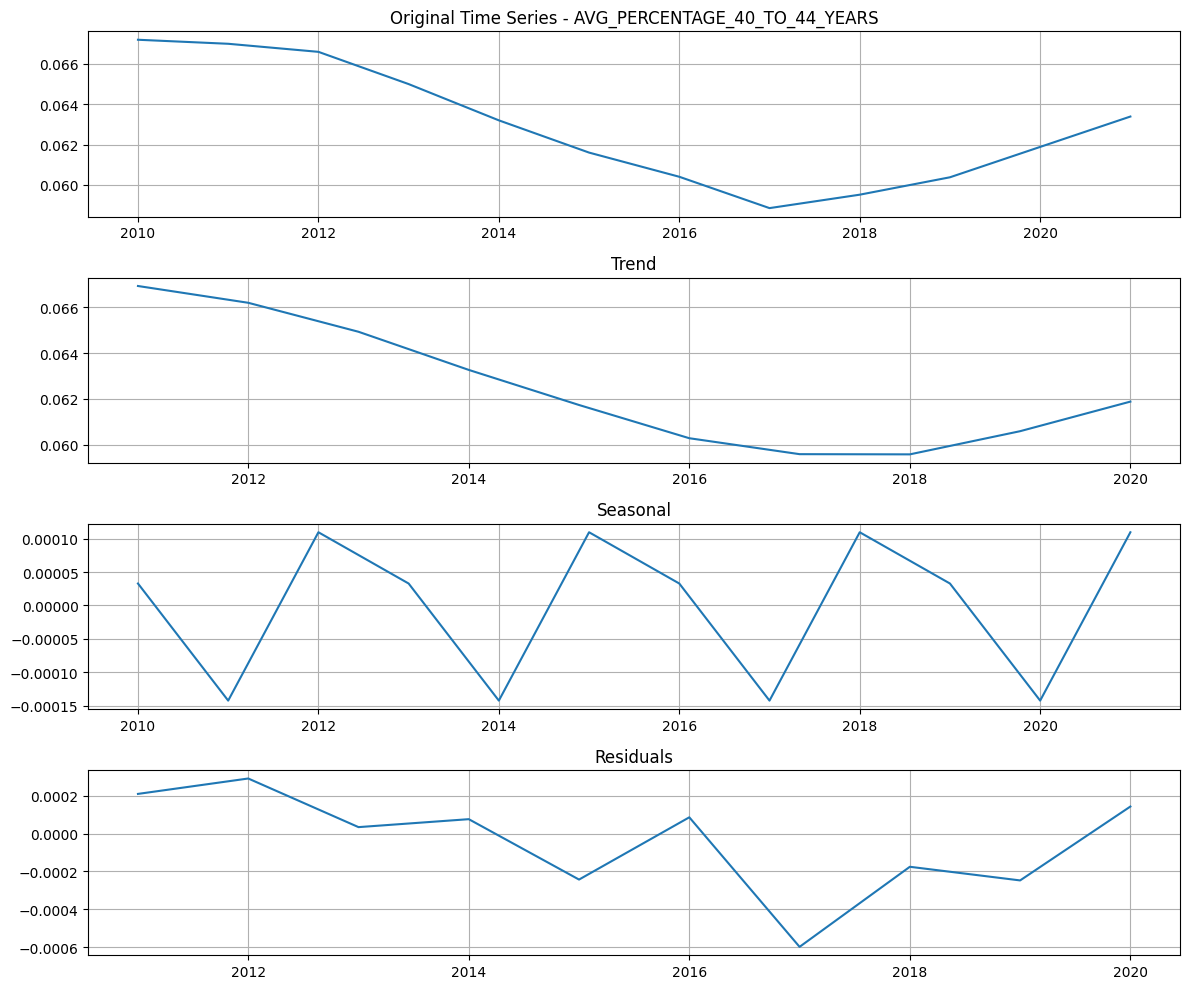

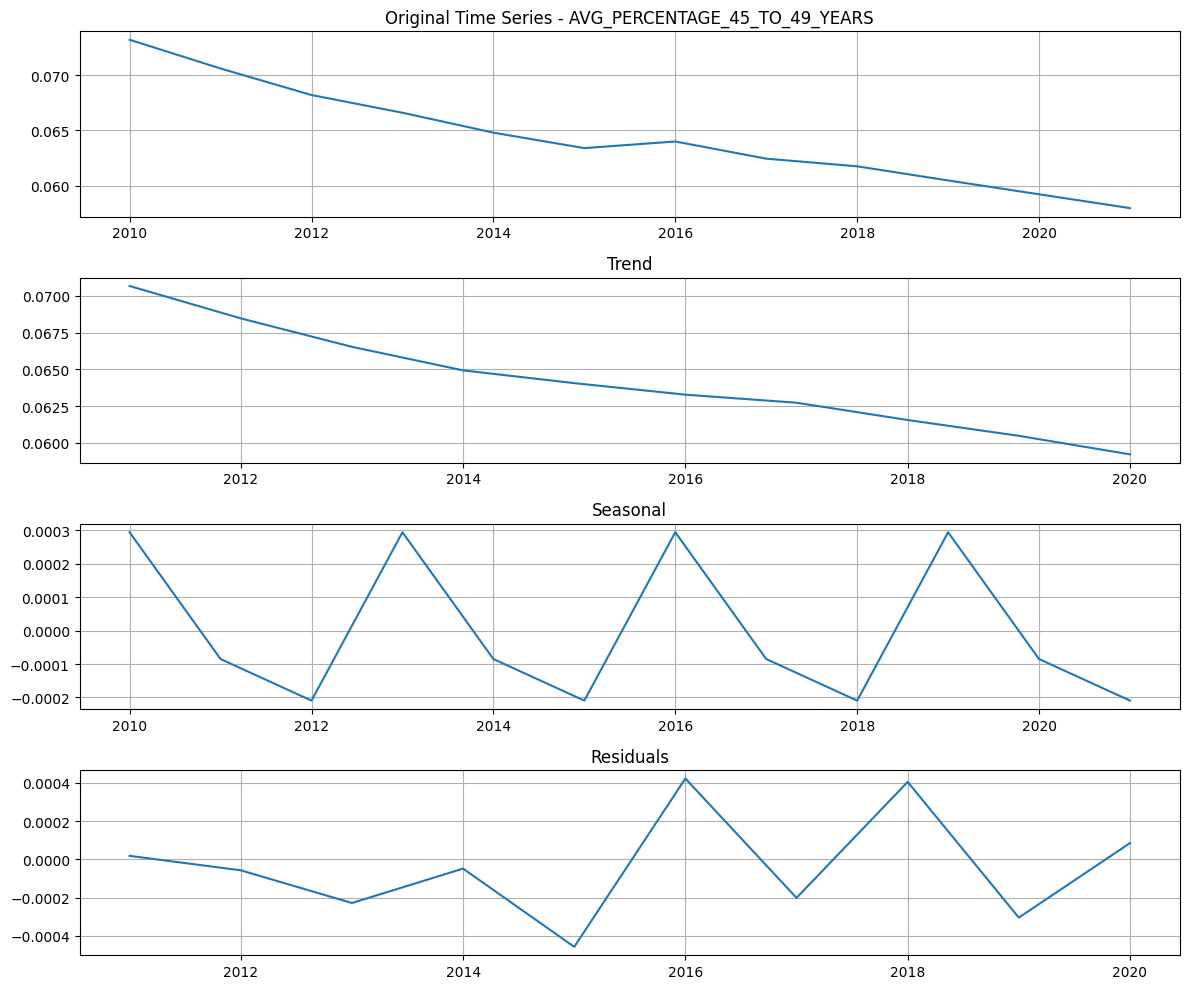

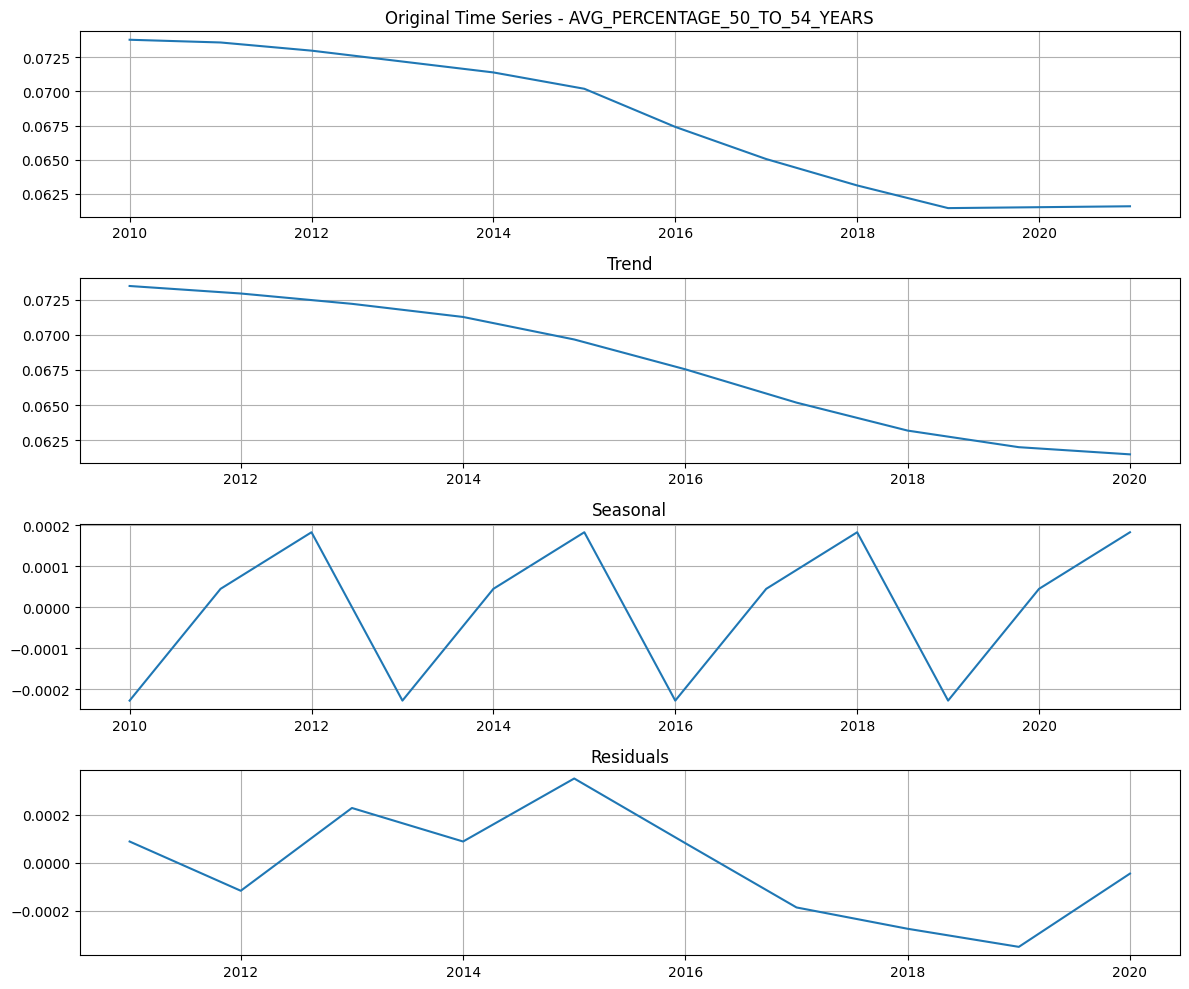

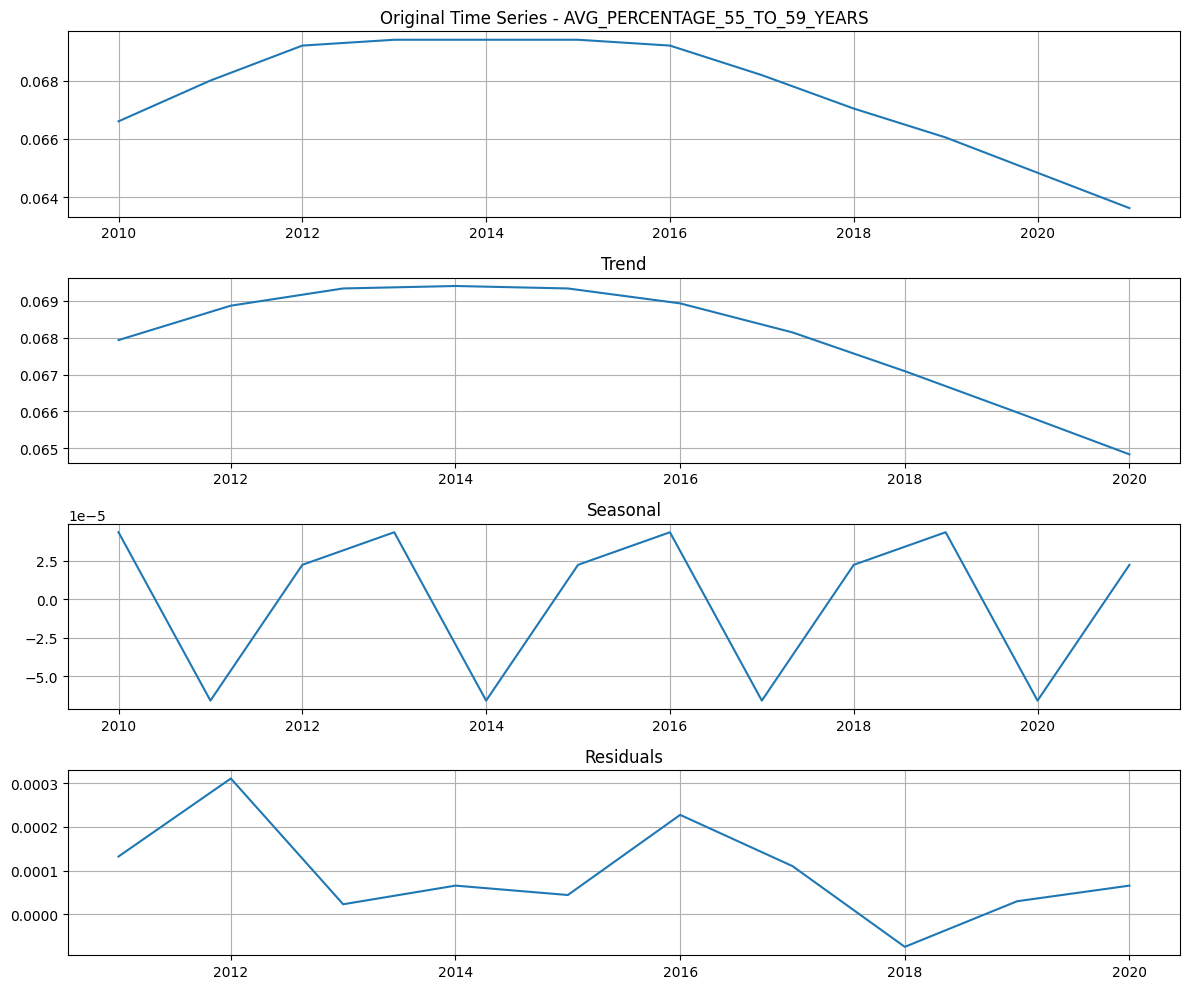

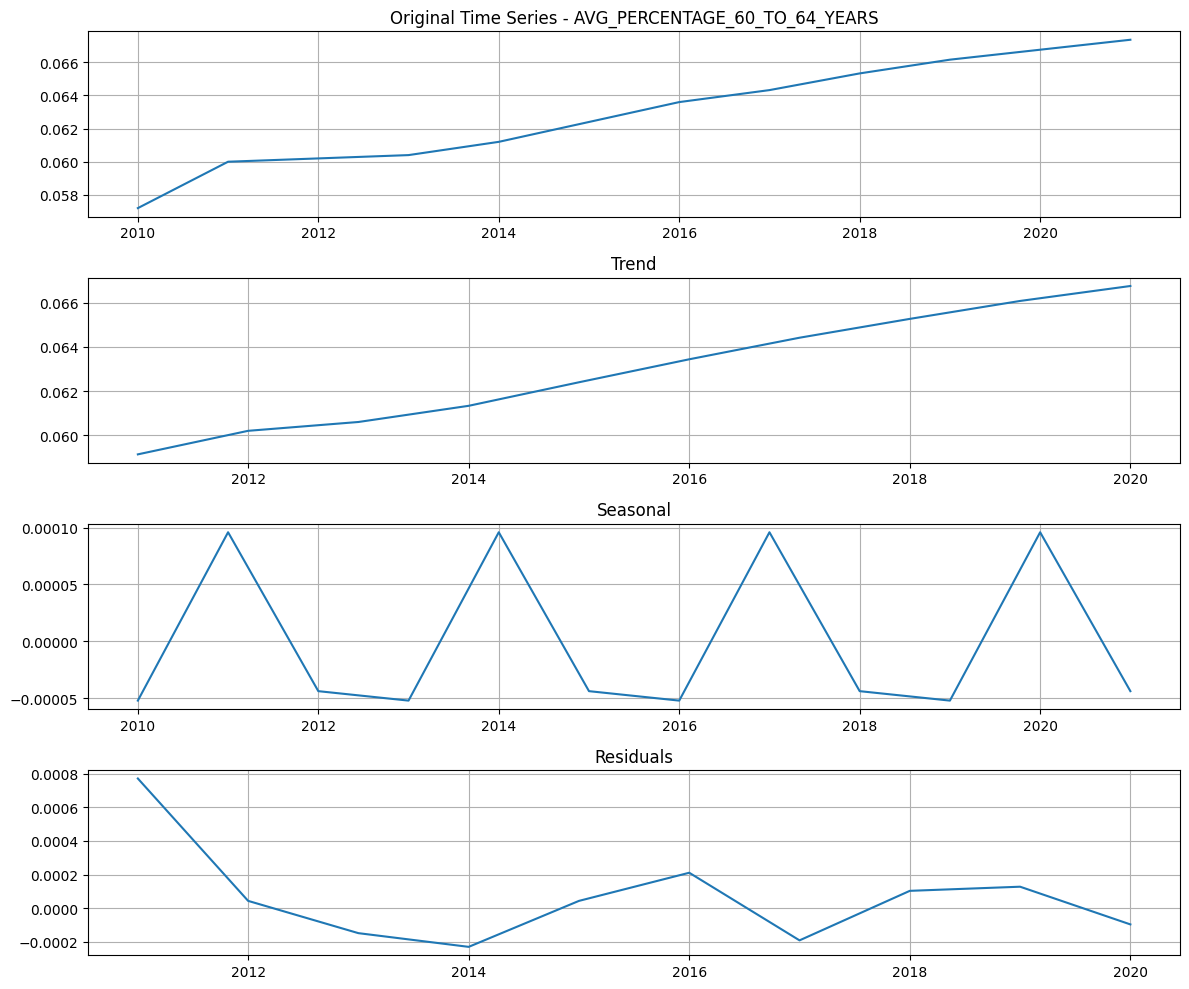

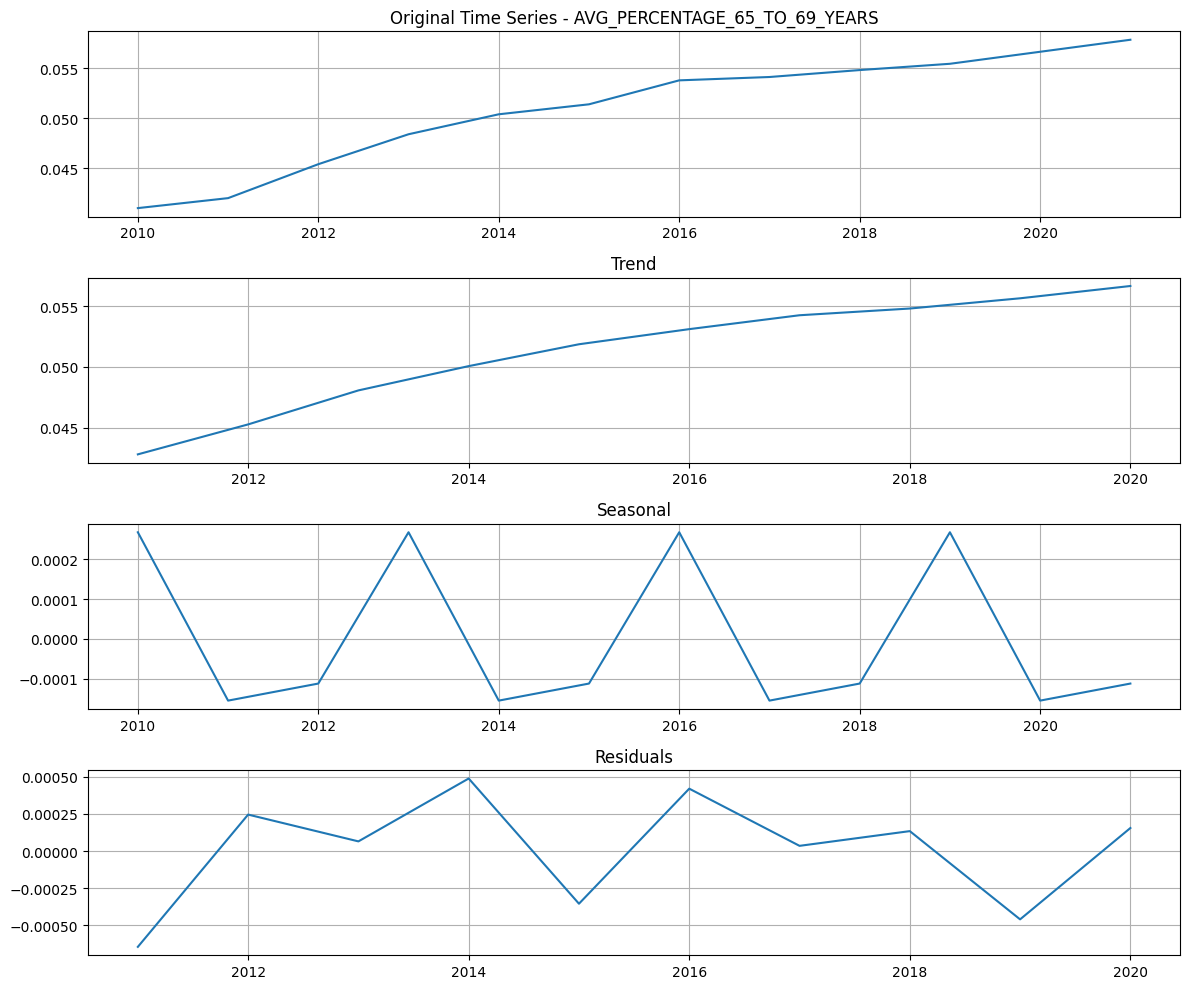

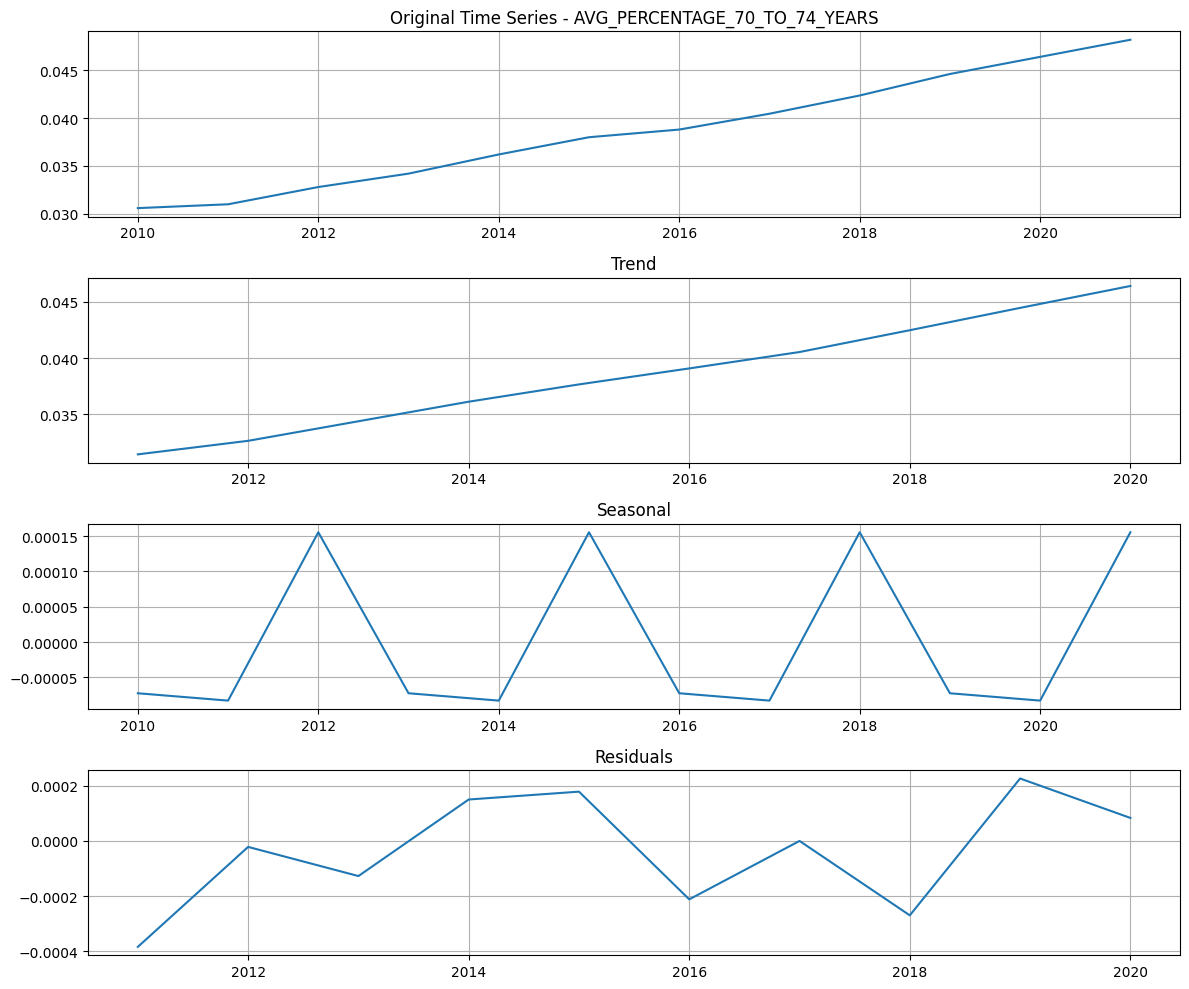

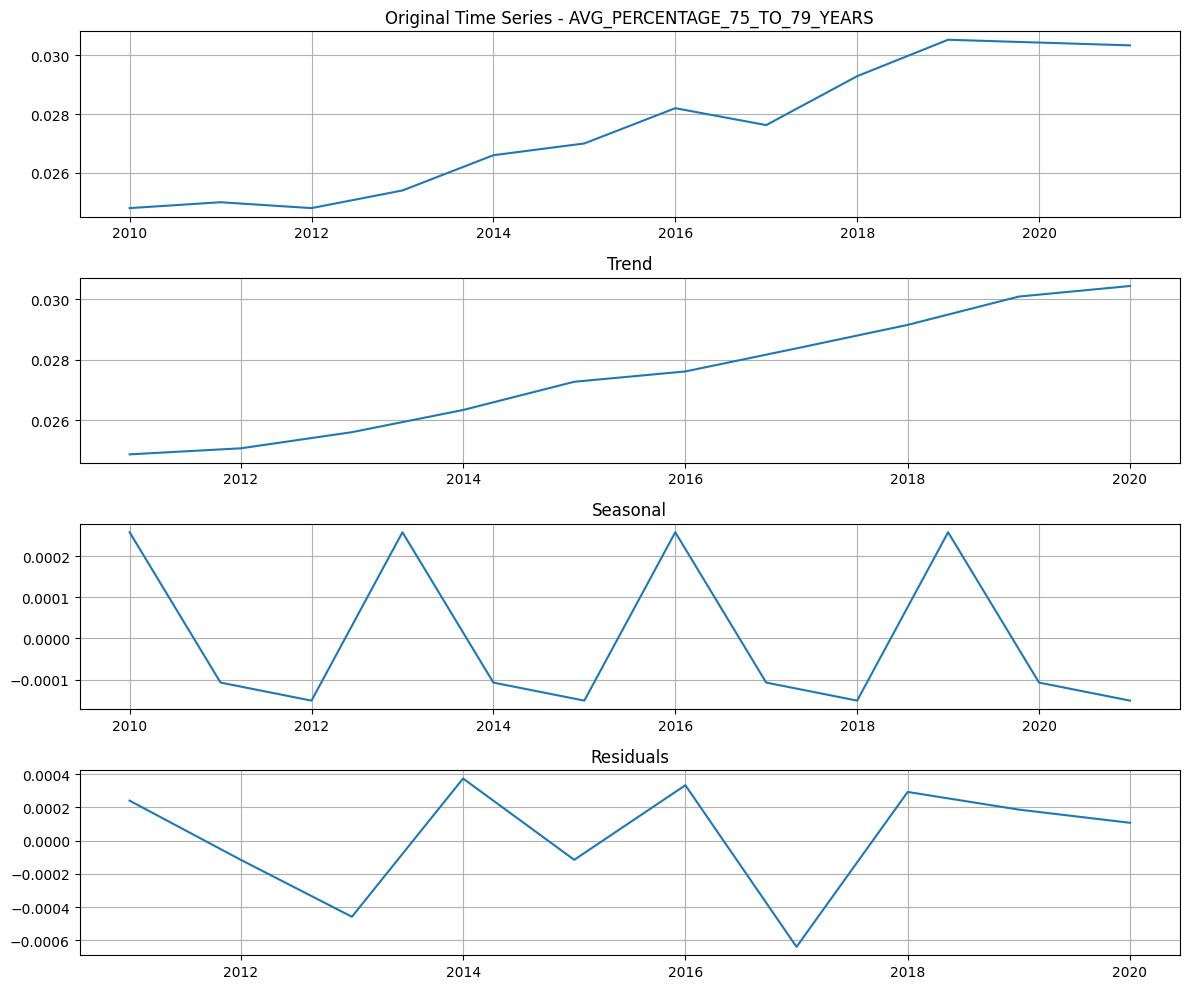

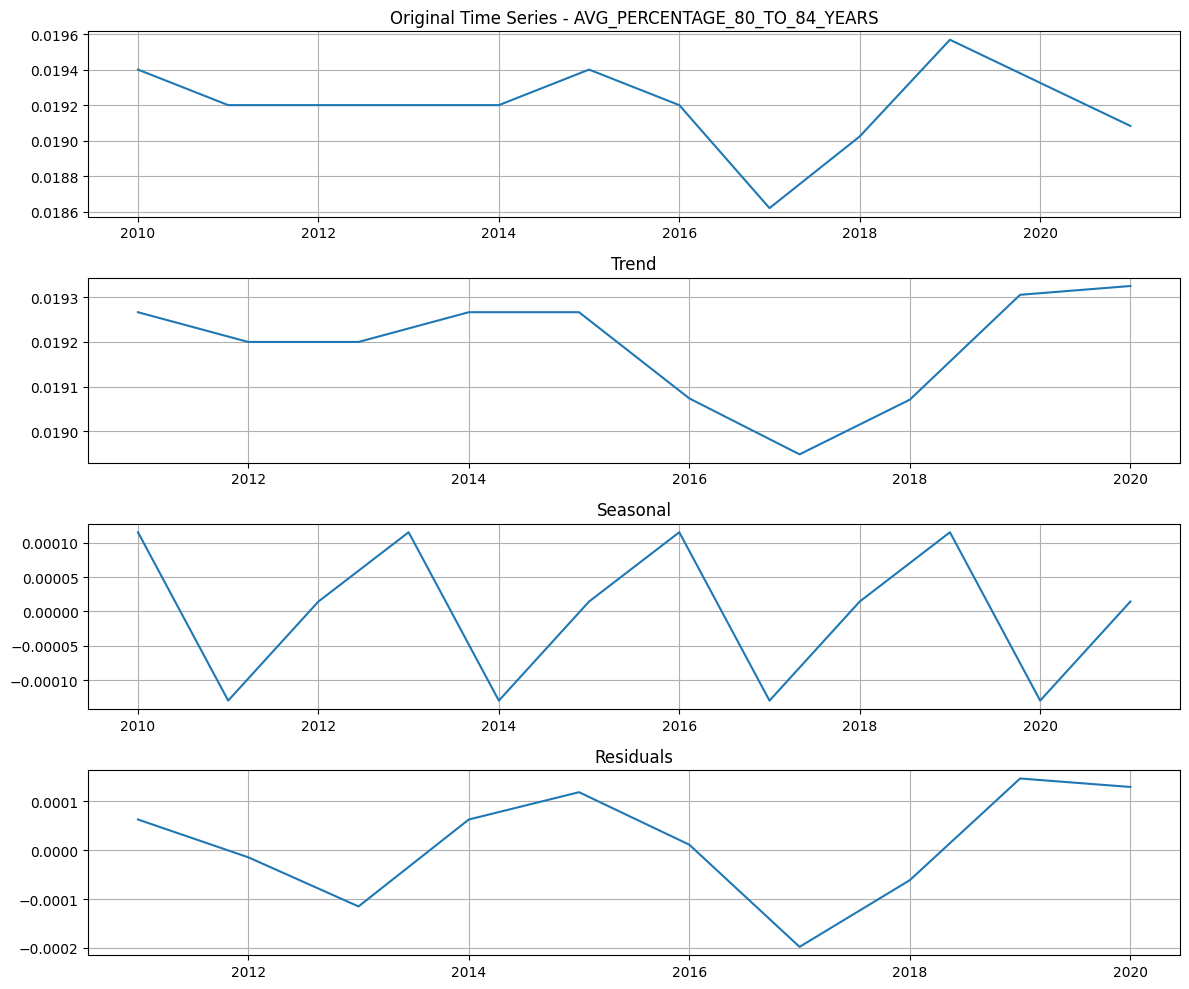

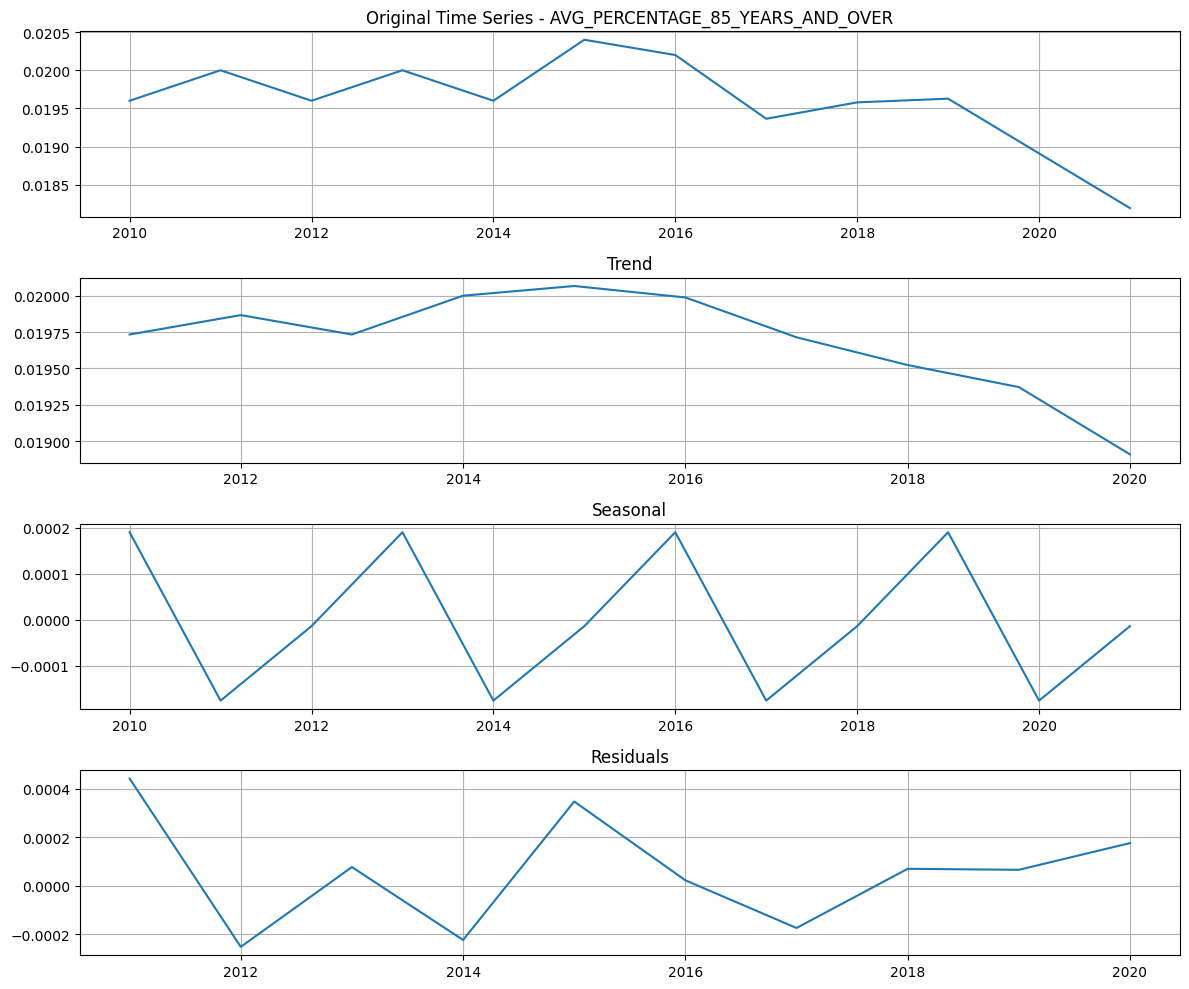

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Set the index to YEAR for time series analysis
ts_data = average_by_state_full_dataset.set_index('YEAR')

# For each column, create decomposition plots
for column in ts_data.columns:
    # Perform seasonal decomposition
    decomposition = seasonal_decompose(ts_data[column], period=3, model='additive')
    
    # Create subplot
    plt.figure(figsize=(12, 10))
    plt.subplot(411)
    plt.plot(ts_data.index, ts_data[column])
    plt.title(f'Original Time Series - {column}')
    plt.grid(True)
    
    plt.subplot(412)
    plt.plot(ts_data.index, decomposition.trend)
    plt.title('Trend')
    plt.grid(True)
    
    plt.subplot(413)
    plt.plot(ts_data.index, decomposition.seasonal)
    plt.title('Seasonal')
    plt.grid(True)
    
    plt.subplot(414)
    plt.plot(ts_data.index, decomposition.resid)
    plt.title('Residuals')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()


### Interpretation of Time Series Decomposition

When analyzing time series data, the decomposition into trend, seasonal, and residual components can provide valuable insights into the underlying patterns. Here's how to interpret each of these components:

1. **Trend Component**:
   - **Definition**: The trend component represents the long-term progression of the time series data. It shows the general direction in which the data is moving over time, whether it's increasing, decreasing, or remaining constant.
   - **Interpretation**: 
     - An upward trend indicates a general increase in the data over time.
     - A downward trend suggests a general decrease.
     - A flat trend line indicates stability in the data.
   - **Use**: Identifying the trend helps in understanding the overall direction and can be useful for making long-term forecasts.

2. **Seasonal Component**:
   - **Definition**: The seasonal component captures the repeating short-term cycle in the data. This could be daily, monthly, quarterly, or yearly patterns that repeat at regular intervals.
   - **Interpretation**:
     - Peaks and troughs in the seasonal component indicate periods of high and low activity, respectively.
     - The amplitude of the seasonal component shows the strength of the seasonal effect.
   - **Use**: Understanding seasonality is crucial for making accurate short-term predictions and for planning around predictable fluctuations.

3. **Residual Component**:
   - **Definition**: The residual component (or irregular component) represents the random noise in the data that cannot be explained by the trend or seasonal components. It includes any anomalies or irregularities.
   - **Interpretation**:
     - Large residuals may indicate outliers or unusual events that are not captured by the trend or seasonality.
     - A pattern in the residuals might suggest that the model is missing some aspect of the data.
   - **Use**: Analyzing residuals helps in assessing the fit of the model. Ideally, residuals should be random and not show any systematic pattern.

By examining these components, you can gain a comprehensive understanding of the time series data, which aids in making informed decisions and improving forecasting models.

In [16]:

# Preprocess data for ARIMA modeling
# 1. Check for stationarity and apply transformations if needed
# 2. Handle any missing values
# 3. Store preprocessed data in new dataframe

from scipy import stats
import numpy as np
from statsmodels.tsa.stattools import adfuller
from decimal import Decimal

def make_stationary(series):
    # Convert Decimal to float if necessary
    if isinstance(series.iloc[0], Decimal):
        series = series.apply(float)
    
    # Try log transformation first if data is strictly positive
    if (series > 0).all():
        series = np.log1p(series)
    
    # Apply differencing until stationary or max 2 differences
    n_diff = 0
    while n_diff <= 2:
        # Perform ADF test
        adf_result = adfuller(series, autolag='AIC')
        
        if adf_result[1] < 0.05:  # Series is stationary
            break
            
        # If not stationary, difference the series
        series = series.diff().dropna()
        n_diff += 1
    
    return series

# Create new dataframe for preprocessed data
ts_data_processed = pd.DataFrame()

for column in ts_data.columns:
    # Get the series
    series = ts_data[column]
    
    # Handle missing values if any
    series = series.interpolate(method='linear')
    
    # Make stationary
    processed_series = make_stationary(series)
    
    # Add to processed dataframe
    ts_data_processed[column] = processed_series

# Drop any remaining NaN values
ts_data_processed = ts_data_processed.dropna()

print("Preprocessing complete. Original shape:", ts_data.shape)
print("Processed shape:", ts_data_processed.shape)


Preprocessing complete. Original shape: (12, 25)
Processed shape: (9, 25)


In [18]:

# Parameter sweep for ARIMA models
from statsmodels.tsa.arima.model import ARIMA
from itertools import product
import warnings
warnings.filterwarnings('ignore')

# Define parameter ranges to test
p_values = range(0, 5)  # AR parameter
d_values = range(0, 5)  # Differencing
q_values = range(0, 5)  # MA parameter

# Function to evaluate ARIMA model
def evaluate_arima(data, p, d, q):
    try:
        model = ARIMA(data, order=(p,d,q))
        results = model.fit()
        return results.aic
    except Exception as e:
        # This may fail for several reasons:
        # 1. Non-stationary data when d=0 (data needs differencing)
        # 2. Singular matrices in calculation (data has perfect correlation)
        # 3. Non-invertible MA parameters
        # 4. Insufficient data for the specified order
        # Return inf so this parameter combination is discarded
        return float('inf')

# Store results for each column
best_params = {}

# Columns to analyze (excluding YEAR which is the index)
columns_to_analyze = ts_data_processed.columns

for column in columns_to_analyze:
    print(f"\nAnalyzing {column}")
    best_aic = float('inf')
    best_pdq = None
    
    # Grid search
    for p, d, q in product(p_values, d_values, q_values):
        aic = evaluate_arima(ts_data_processed[column], p, d, q)
        
        if aic < best_aic:
            best_aic = aic
            best_pdq = (p, d, q)
            
    best_params[column] = {
        'order': best_pdq,
        'AIC': best_aic
    }
    print(f"Best parameters (p,d,q): {best_pdq}")
    print(f"Best AIC: {best_aic}")

# Display summary of best parameters for all columns
print("\nSummary of Best ARIMA Parameters:")
for column, params in best_params.items():
    print(f"\n{column}:")
    print(f"Order (p,d,q): {params['order']}")
    print(f"AIC: {params['AIC']}")



Analyzing AVG_POPULATION
Best parameters (p,d,q): (1, 1, 2)
Best AIC: -64.1944209333816

Analyzing AVG_GDP
Best parameters (p,d,q): (0, 0, 3)
Best AIC: -45.93478605246427

Analyzing AVG_BIRTHS
Best parameters (p,d,q): (0, 0, 1)
Best AIC: -42.02880251206129

Analyzing AVG_HOUSING_UNITS
Best parameters (p,d,q): (0, 0, 0)
Best AIC: -96.14192332545474

Analyzing AVG_HOUSE_PRICE_INDEX
Best parameters (p,d,q): (0, 0, 0)
Best AIC: -35.593328017630036

Analyzing AVG_OUTFLOW_MIGRATION
Best parameters (p,d,q): (2, 0, 0)
Best AIC: -2.3811452878768726

Analyzing AVG_INFLOW_MIGRATION
Best parameters (p,d,q): (2, 0, 0)
Best AIC: -5.305473438322755

Analyzing AVG_PERCENTAGE_UNDER_5_YEARS
Best parameters (p,d,q): (0, 0, 1)
Best AIC: -113.61589640805515

Analyzing AVG_PERCENTAGE_5_TO_9_YEARS
Best parameters (p,d,q): (0, 0, 1)
Best AIC: -98.44887183050008

Analyzing AVG_PERCENTAGE_10_TO_14_YEARS
Best parameters (p,d,q): (0, 0, 1)
Best AIC: -97.4426556227712

Analyzing AVG_PERCENTAGE_15_TO_19_YEARS
Best

In [27]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from itertools import product

# Define confidence level
confidence_level = 0.95
alpha = 1 - confidence_level

# Function to calculate prediction intervals for ARIMA model forecasts
def calculate_prediction_intervals(model, steps=1, alpha=alpha):
    forecast = model.get_forecast(steps=steps)
    prediction_intervals = forecast.conf_int(alpha=alpha)
    return prediction_intervals.iloc[-1]  # Return only the interval for the final timestep

# Function to evaluate ARIMA model and return evaluation metrics
def evaluate_model(data, order):
    model = ARIMA(data, order=order)
    results = model.fit()
    aic = results.aic
    bic = results.bic
    hqic = results.hqic
    pred_intervals = calculate_prediction_intervals(results)
    return aic, bic, hqic, pred_intervals

# Store results for each column
model_evaluation = {}

for column in columns_to_analyze:
    order = best_params[column]['order']
    aic, bic, hqic, pred_intervals = evaluate_model(ts_data_processed[column], order)
    
    model_evaluation[column] = {
        'AIC': aic,
        'BIC': bic,
        'HQIC': hqic,
        'Prediction Intervals': pred_intervals
    }

# Display comprehensive report
print(f"\nComprehensive Report on Model Reliability and Expected Forecast Errors (Confidence Level: {confidence_level*100}%):")
for column, evaluation in model_evaluation.items():
    print(f"\n{column}:")
    print(f"AIC: {evaluation['AIC']}")
    print(f"BIC: {evaluation['BIC']}")
    print(f"HQIC: {evaluation['HQIC']}")
    print(f"Prediction Intervals for Next Timestep ({confidence_level*100}% Probability):")
    print(evaluation['Prediction Intervals'])



Comprehensive Report on Model Reliability and Expected Forecast Errors (Confidence Level: 95.0%):

AVG_POPULATION:
AIC: -64.1944209333816
BIC: -63.87665476666225
HQIC: -66.33762598869004
Prediction Intervals for Next Timestep (95.0% Probability):
lower AVG_POPULATION    15.709464
upper AVG_POPULATION    15.717271
Name: 9, dtype: float64

AVG_GDP:
AIC: -45.93478605246427
BIC: -44.948663165783174
HQIC: -48.062835970697826
Prediction Intervals for Next Timestep (95.0% Probability):
lower AVG_GDP   -0.012063
upper AVG_GDP    0.016282
Name: 9, dtype: float64

AVG_BIRTHS:
AIC: -42.02880251206129
BIC: -41.43712878005263
HQIC: -43.30563246300142
Prediction Intervals for Next Timestep (95.0% Probability):
lower AVG_BIRTHS   -0.061214
upper AVG_BIRTHS   -0.000510
Name: 9, dtype: float64

AVG_HOUSING_UNITS:
AIC: -96.14192332545474
BIC: -95.7474741707823
HQIC: -96.99314329274816
Prediction Intervals for Next Timestep (95.0% Probability):
lower AVG_HOUSING_UNITS   -0.001649
upper AVG_HOUSING_UNITS

In [ ]:
# Explanation of AIC, BIC, and HQIC
# AIC (Akaike Information Criterion) is a measure of the relative quality of a statistical model for a given set of data. It estimates the quality of each model, relative to each of the other models. The lower the AIC, the better the model.
# BIC (Bayesian Information Criterion) is similar to AIC but includes a penalty term for the number of parameters in the model. It is used for model selection among a finite set of models. The model with the lowest BIC is preferred.
# HQIC (Hannan-Quinn Information Criterion) is another criterion for model selection. It is similar to AIC and BIC but uses a different penalty term. Like AIC and BIC, a lower HQIC indicates a better model.


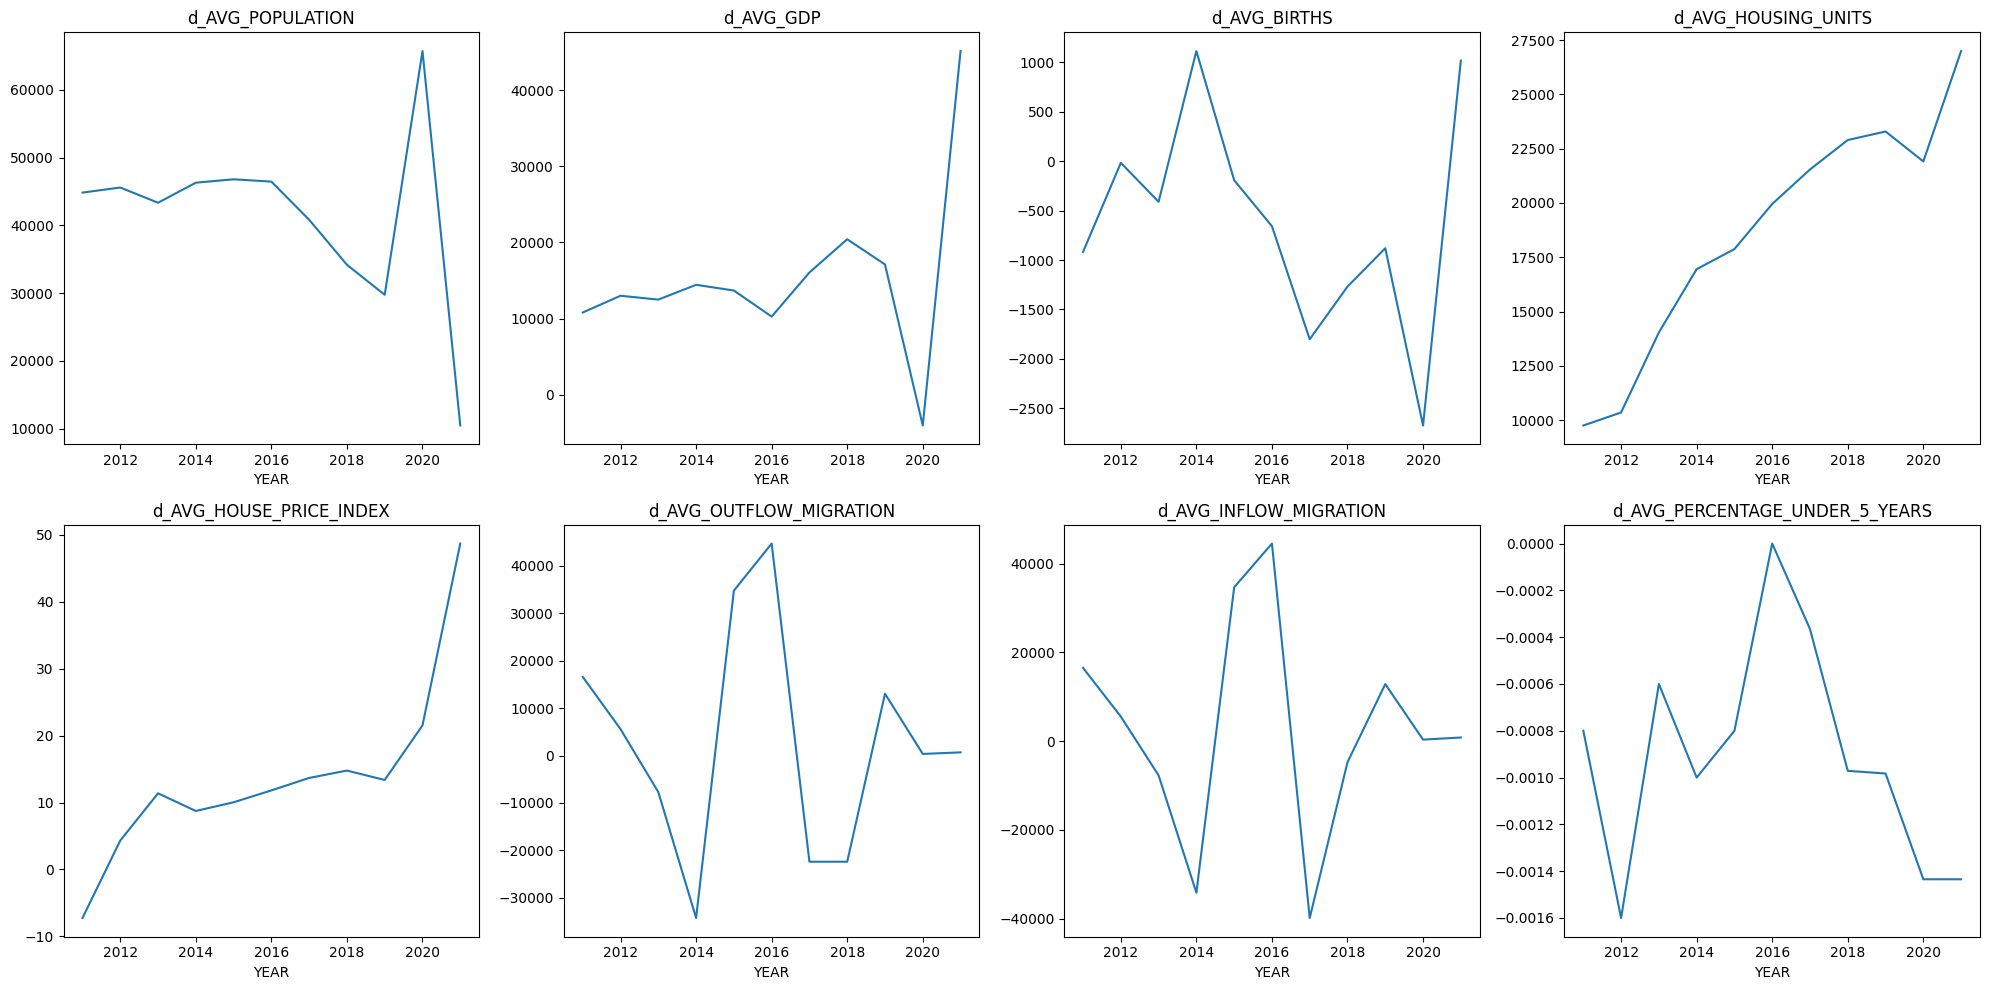

TypeError: multi_ACFfig() got an unexpected keyword argument 'ax'

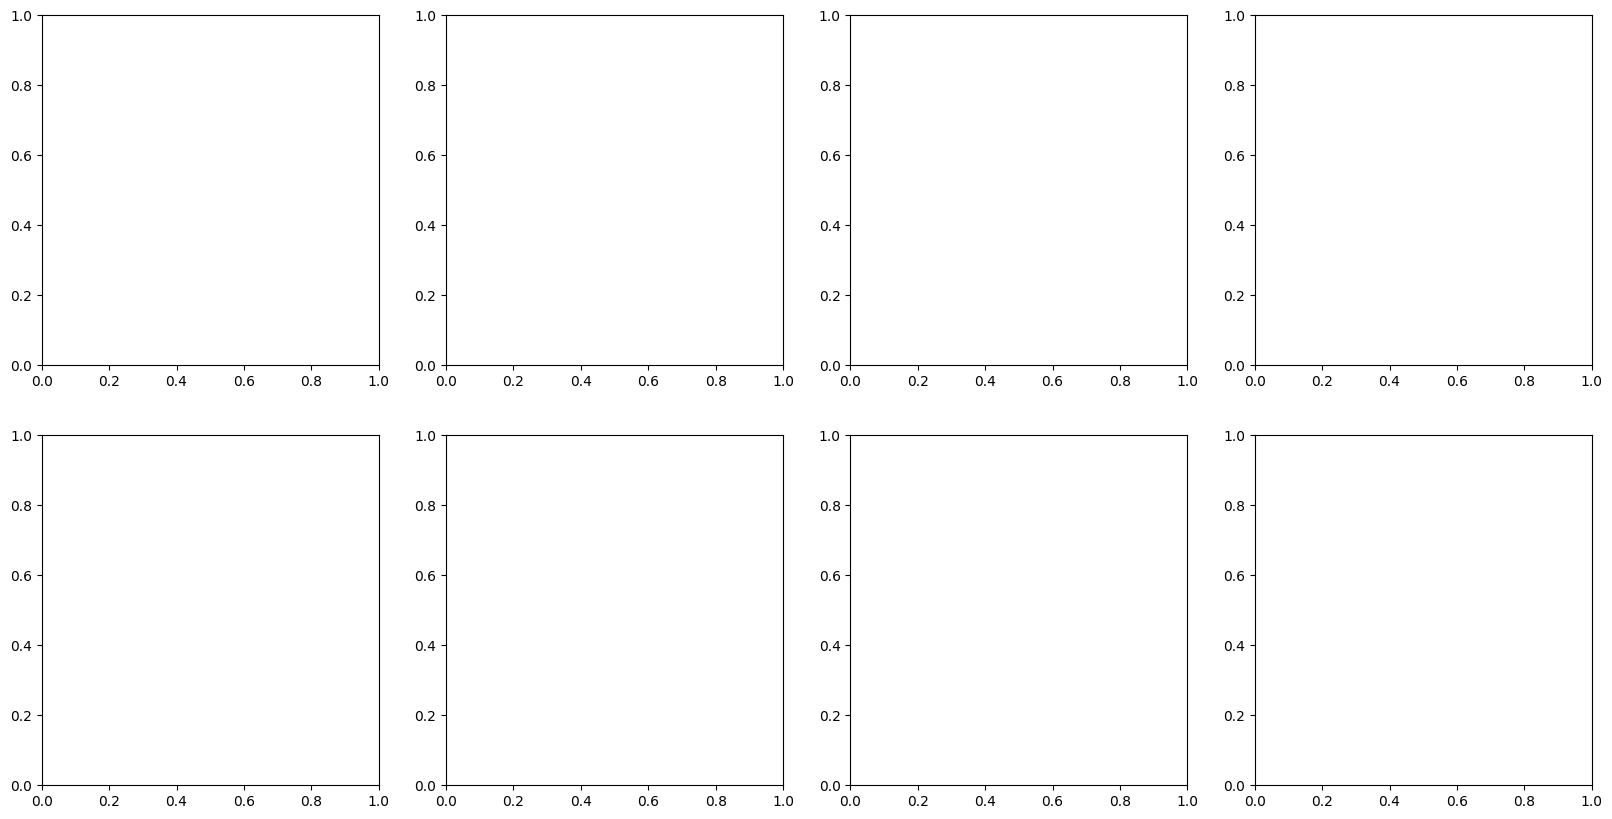

In [19]:
from PythonTsa.plot_multi_ACF import multi_ACFfig
from statsmodels.stats.diagnostic import acorr_ljungbox
import matplotlib.pyplot as plt
import numpy as np

# Assuming average_by_state_full_dataset is already loaded as a DataFrame
avg_df = average_by_state_full_dataset.copy()

# Ensure the DataFrame has a datetime index; adjust the column name if different
avg_df['YEAR'] = avg_df['YEAR'].astype(int)
avg_df.set_index('YEAR', inplace=True)

# Select relevant columns; update column names if they differ
needed_columns = ['AVG_POPULATION', 'AVG_GDP', 'AVG_BIRTHS', 'AVG_HOUSING_UNITS',
       'AVG_HOUSE_PRICE_INDEX', 'AVG_OUTFLOW_MIGRATION',
       'AVG_INFLOW_MIGRATION', 'AVG_PERCENTAGE_UNDER_5_YEARS']

avg_df = avg_df[needed_columns].astype(float)

# Compute first differences and drop missing values
diff_avg_df = avg_df.diff(1).dropna()
diff_avg_df.columns = ['d_'+el for el in needed_columns]

# Plot the differenced data in a more readable format
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))  # Adjusted to 2x4 for 8 plots
axes = axes.flatten()
for i, column in enumerate(diff_avg_df.columns):
    diff_avg_df[column].plot(ax=axes[i], title=column)
plt.tight_layout()
plt.show()

# Plot ACF for the differenced data in a more readable format
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))  # Adjusted to 2x4 for 8 plots
axes = axes.flatten()
for i, column in enumerate(diff_avg_df.columns):
    multi_ACFfig(diff_avg_df[[column]], nlags=16, ax=axes[i])
plt.tight_layout()
plt.show()

# Compute Ljung-Box test for each variable
qs = {}
pv = {}
for column in diff_avg_df.columns:
    lb_test = acorr_ljungbox(diff_avg_df[column], lags=16, return_df=True)
    qs[column] = lb_test['lb_stat'].values
    pv[column] = lb_test['lb_pvalue'].values

# Plot Q p-values in a more readable format
fig, ax = plt.subplots(figsize=(12, 6))
for column in diff_avg_df.columns:
    ax.plot(range(1, 17), pv[column], marker='o', label=column)
ax.axhline(y=0.05, color='r', linestyle='--')
ax.set_xlabel('Lag')
ax.set_ylabel('P-value')
ax.set_title('Ljung-Box Q-Test P-values')
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()